In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from RetinoPathyDatasetClass import RetinopathyDataset_DeepDRiD
from MyModels import Resnet18_Single, VGG16_Single, Resnet34_Single
from TrainModel import train_model, evaluate_model
from Augmentations import CutOut, FundRandomRotate, SLORandomPad
from Visualizations import plotTrainingValCurves, plotPatientEyeImgsWithLabels, plotRandomPatientEyeImagesWithGRADCam
from torchvision import transforms
from torch.utils.data import DataLoader

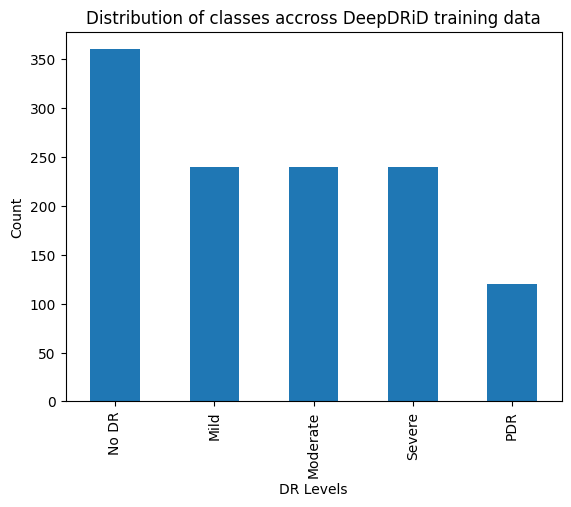

In [2]:
# Exploring DeepDRiD Dataset see how instances are distributed across classes.
train_df_DeepDRid = pd.read_csv('./DeepDRiD/train.csv')
train_counts = train_df_DeepDRid.patient_DR_Level.value_counts()
train_counts.plot(kind='bar')

dr_level_labels = {
    0: 'No DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'PDR'
}

plt.xticks(ticks=range(len(dr_level_labels)), labels=list(dr_level_labels.values()))
plt.grid(False)
plt.title('Distribution of classes accross DeepDRiD training data')
plt.xlabel('DR Levels')
plt.ylabel('Count')
plt.show()

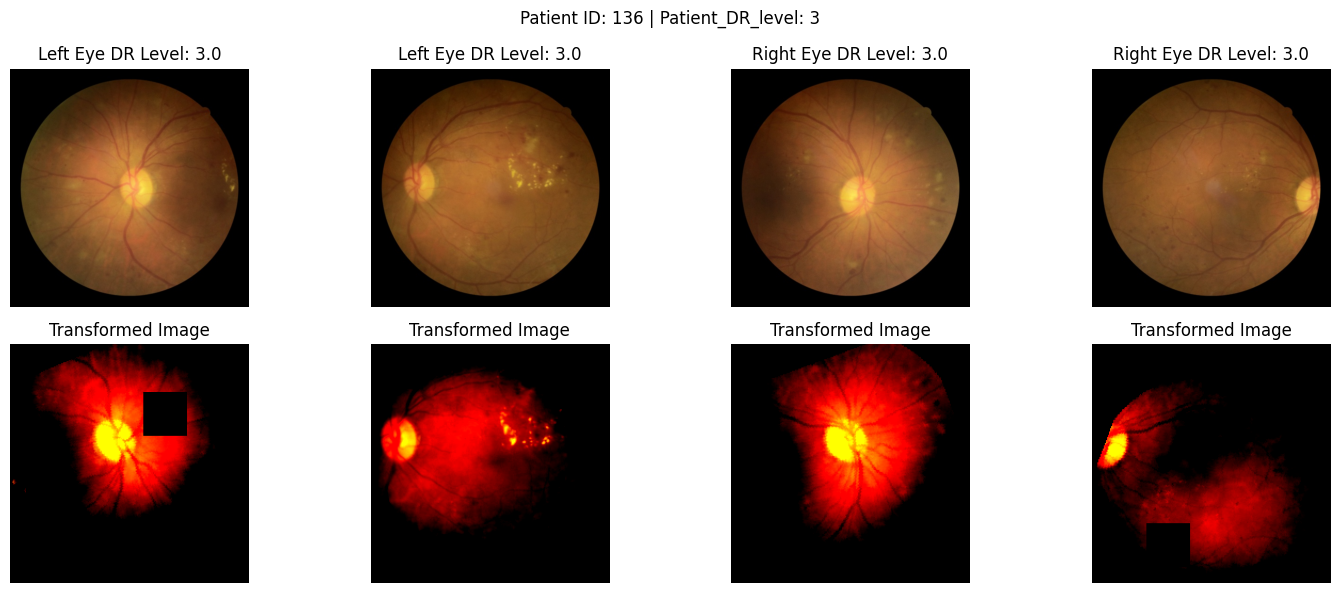

In [3]:
# Hyper Parameters and Transformations and Data Loaders
batch_size = 24
num_classes = 5  # 5 DR levels
learning_rate = 0.0001
num_epochs = 20

transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((210, 210)),
    SLORandomPad((224, 224)),
    FundRandomRotate(prob=0.5, degree=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    CutOut(mask_size=40, p=0.5),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Visualizing how the transformations look
train_df = pd.read_csv('./DeepDRiD/train.csv') 
images = './DeepDRiD/train/'
random_patient = random.choice(train_df['patient_id'].unique()) 

plotPatientEyeImgsWithLabels(train_df, random_patient, images, transform_train)

# using 'single' mode.
mode = 'single'
train_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/train.csv', './DeepDRiD/train/', transform_train, mode)
val_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/val.csv', './DeepDRiD/val/', transform_test, mode)
test_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/test.csv', './DeepDRiD/test/', transform_test, mode, test=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Device: cuda


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch 1/20
Training: 100%|██████████| 50/50 [00:17<00:00,  2.80 batch/s, lr=1.0e-04, Loss=1.4754]
[Train] Kappa: 0.4070 Accuracy: 0.4200 Precision: 0.3851 Recall: 0.4200 Loss: 1.4119
[Train] Class 0: Precision: 0.6683, Recall: 0.7778
[Train] Class 1: Precision: 0.2893, Recall: 0.2917
[Train] Class 2: Precision: 0.2636, Recall: 0.2417
[Train] Class 3: Precision: 0.3298, Recall: 0.3875
[Train] Class 4: Precision: 0.0811, Recall: 0.0250
Evaluating: 100%|██████████| 17/17 [00:05<00:00,  3.29 batch/s]
[Val] Kappa: 0.6336 Accuracy: 0.5175 Precision: 0.4827 Recall: 0.5175

Epoch 2/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.52 batch/s, lr=1.0e-04, Loss=0.9959]
[Train] Kappa: 0.6585 Accuracy: 0.5333 Precision: 0.5060 Recall: 0.5333 Loss: 1.1522
[Train] Class 0: Precision: 0.7778, Recall: 0.9722
[Train] Class 1: Precision: 0.4424, Recall: 0.4000
[Train] Class 2: Precision: 0.3065, Recall: 0.3167
[Train] Class 3: Precision: 0.4143, Recall: 0.4833
[Train] Class 4: Precision: 0.4000, Rec

<Figure size 600x500 with 0 Axes>

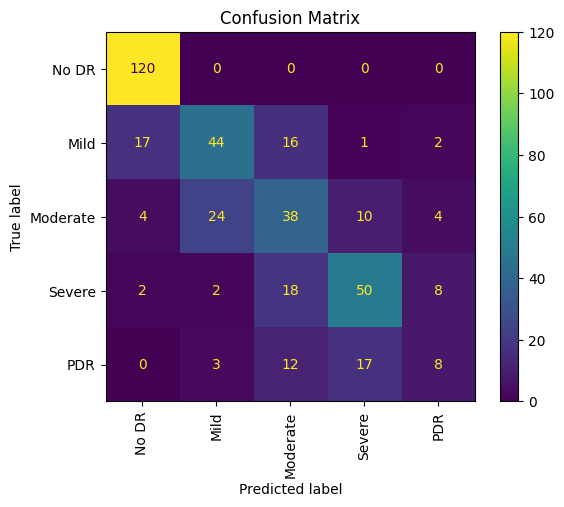

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\2809543373.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:05<00:00,  3.25 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18.csv


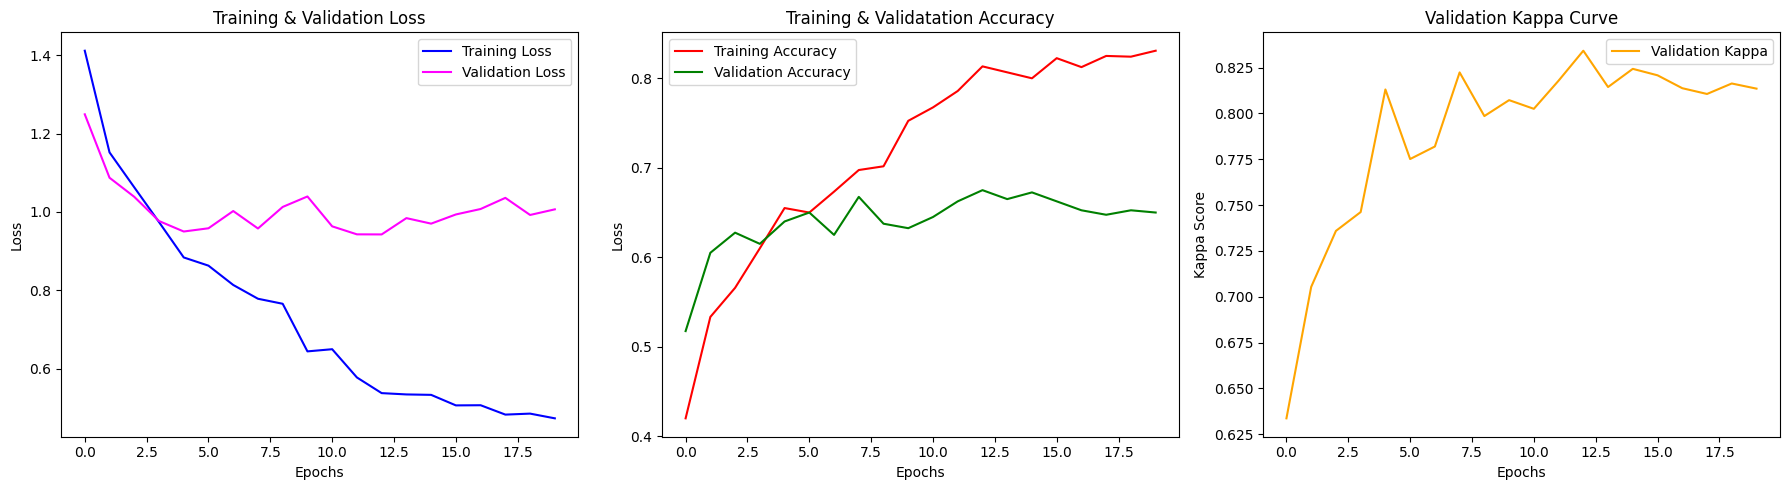

resnet18
Avg Kappa Score for 20 epochs:  0.7894216295947606
All Kappa Scores:
 [0.6336379669713004, 0.7053597867930115, 0.7359282303574013, 0.7462115639252611, 0.8131109833237493, 0.7751479289940828, 0.78197884977546, 0.8224172856178258, 0.7985962770826975, 0.8072880168185004, 0.802547770700637, 0.8179112937508857, 0.8342580736946934, 0.8144461822835205, 0.8243626062322946, 0.8208375305799396, 0.8137990762124712, 0.8106551475881929, 0.8163739294527508, 0.8135640917405376]


In [4]:
# a) Fine-tuning an ImageNet pretrained Model on the DeepDRiD Data. 
# Trying Resnet18
# Different Augmentations and Transformations. 

# Selecting resnet18 Model, with Single image option
model_name = 'resnet18'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores:\n', val_kappas)

del model
torch.cuda.empty_cache()


Device: cuda


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch 1/20
Training: 100%|██████████| 50/50 [00:17<00:00,  2.93 batch/s, lr=1.0e-04, Loss=1.4069]
[Train] Kappa: 0.2457 Accuracy: 0.3508 Precision: 0.3040 Recall: 0.3508 Loss: 1.4961
[Train] Class 0: Precision: 0.4662, Recall: 0.7472
[Train] Class 1: Precision: 0.2395, Recall: 0.1667
[Train] Class 2: Precision: 0.2381, Recall: 0.0833
[Train] Class 3: Precision: 0.2780, Recall: 0.3417
[Train] Class 4: Precision: 0.1299, Recall: 0.0833
Evaluating: 100%|██████████| 17/17 [00:02<00:00,  5.83 batch/s]
[Val] Kappa: 0.6217 Accuracy: 0.5150 Precision: 0.3662 Recall: 0.5150

Epoch 2/20
Training: 100%|██████████| 50/50 [00:15<00:00,  3.14 batch/s, lr=1.0e-04, Loss=0.9913]
[Train] Kappa: 0.5477 Accuracy: 0.4542 Precision: 0.3941 Recall: 0.4542 Loss: 1.2892
[Train] Class 0: Precision: 0.6719, Recall: 0.9444
[Train] Class 1: Precision: 0.2956, Recall: 0.1958
[Train] Class 2: Precision: 0.2704, Recall: 0.2625
[Train] Class 3: Precision: 0.3286, Recall: 0.3833
[Train] Class 4: Precision: 0.1364, Rec

<Figure size 600x500 with 0 Axes>

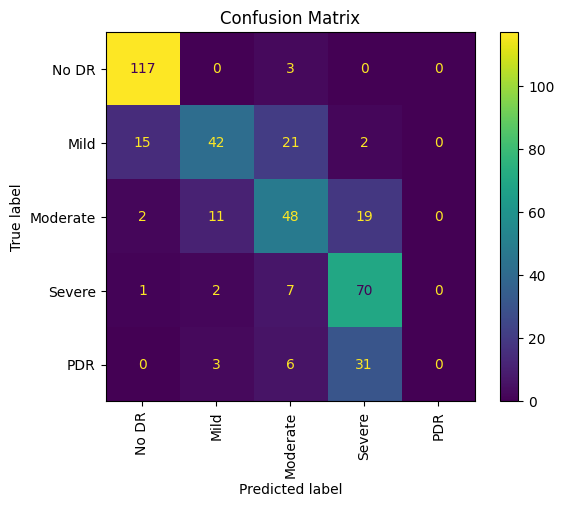

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\3742809237.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:03<00:00,  5.66 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_vgg16.csv


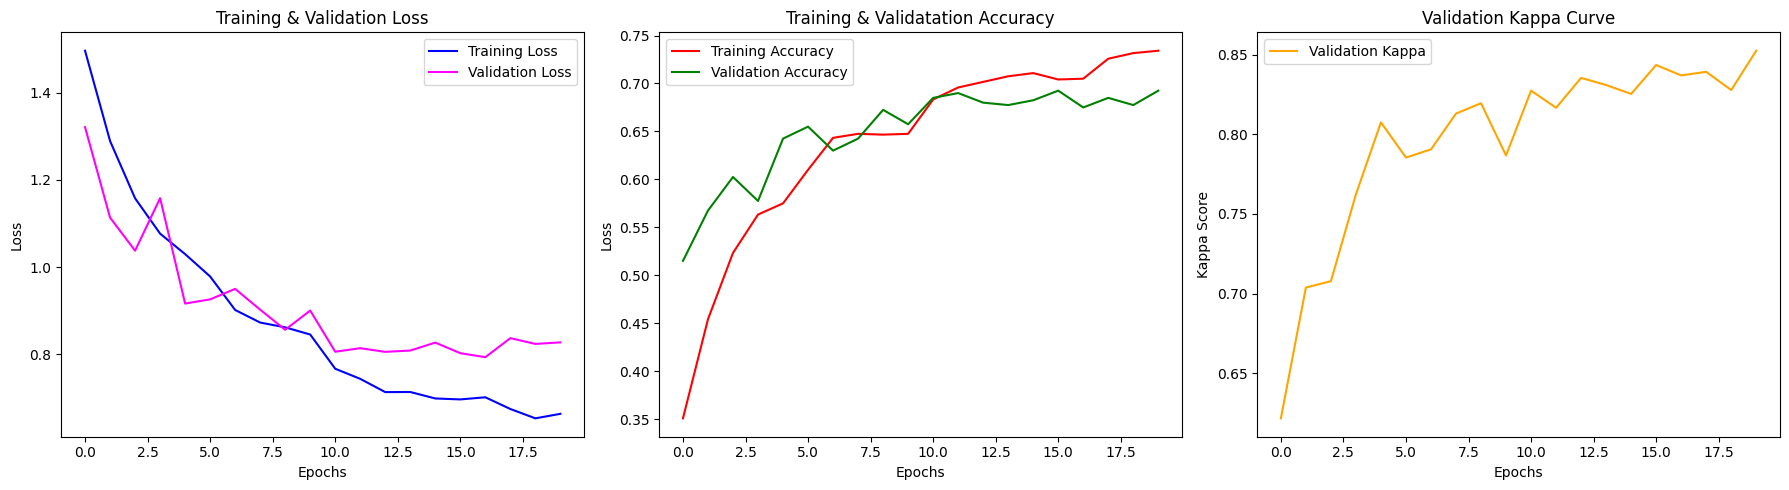

vgg16
Avg Kappa Score for 20 epochs:  0.7966672192713132
All Kappa Scores: 
 [0.6217209479153466, 0.7038104386807558, 0.7077822208551214, 0.7623535747946681, 0.807444523979957, 0.7853644482857967, 0.7905047905047905, 0.812971127862324, 0.819452533488643, 0.7866744593804793, 0.8273844353423054, 0.8166009060353646, 0.835375756680939, 0.8308964702407325, 0.8252985404688191, 0.8434542012523664, 0.8369086100499559, 0.8391856004721157, 0.8277404921700224, 0.8524203069657615]


In [5]:
# a) Fine-tuning an ImageNet pretrained Model on the DeepDRiD Data. 
# Trying VGG-16

# Selecting vgg16 Model, with Single image option
model_name = 'vgg16'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = VGG16_Single()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Device: cuda

Epoch 1/20
Training: 100%|██████████| 50/50 [00:08<00:00,  6.19 batch/s, lr=1.0e-04, Loss=0.9953]
[Train] Kappa: 0.3291 Accuracy: 0.3617 Precision: 0.3776 Recall: 0.3617 Loss: 1.4558
[Train] Class 0: Precision: 0.6667, Recall: 0.6222
[Train] Class 1: Precision: 0.2402, Recall: 0.3333
[Train] Class 2: Precision: 0.2267, Recall: 0.3042
[Train] Class 3: Precision: 0.3684, Recall: 0.2042
[Train] Class 4: Precision: 0.1053, Recall: 0.0667
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  8.55 batch/s]
[Val] Kappa: 0.6601 Accuracy: 0.5250 Precision: 0.5174 Recall: 0.5250

Epoch 2/20
Training: 100%|██████████| 50/50 [00:08<00:00,  5.64 batch/s, lr=1.0e-04, Loss=1.1152]
[Train] Kappa: 0.6220 Accuracy: 0.5217 Precision: 0.5027 Recall: 0.5217 Loss: 1.1839
[Train] Class 0: Precision: 0.7862, Recall: 0.9806
[Train] Class 1: Precision: 0.3790, Recall: 0.3458
[Train] Class 2: Precision: 0.3288, Recall: 0.3042
[Train] Class 3: Precision: 0.3766, Recall: 0.4833
[Train] Class 4: Precision

<Figure size 600x500 with 0 Axes>

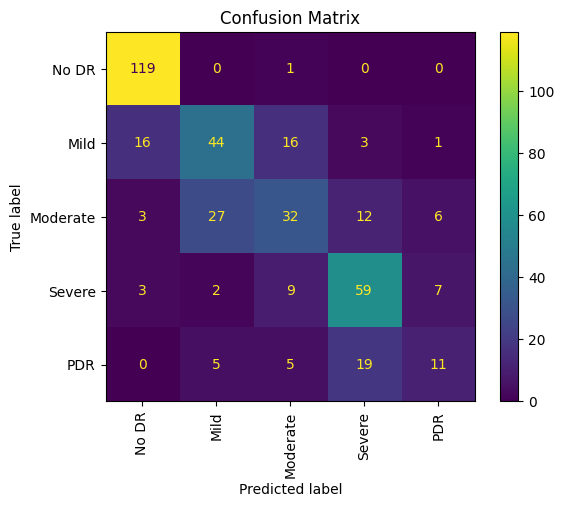

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\68641837.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu')


Evaluating: 100%|██████████| 17/17 [00:01<00:00,  8.66 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet34.csv


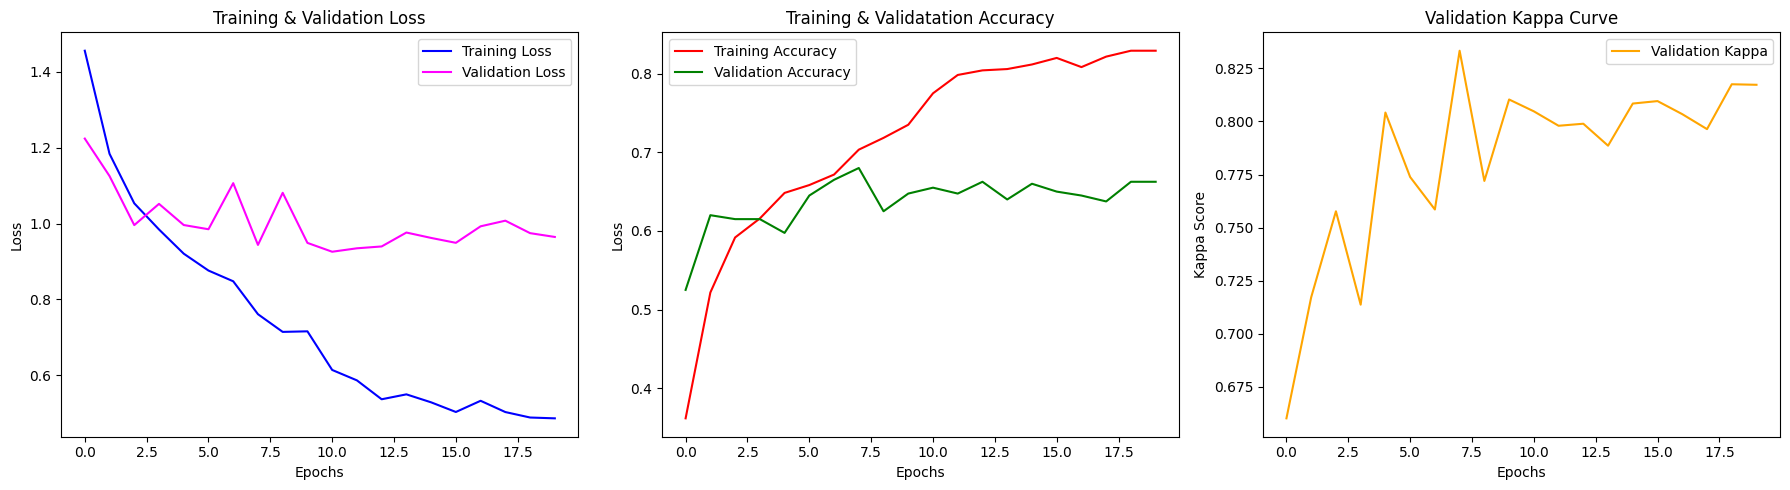

resnet34
Avg Kappa Score for 20 epochs:  0.7822016521773714
All Kappa Scores: 
 [0.6601073345259392, 0.7171660599271913, 0.7576832151300237, 0.7136690647482015, 0.8042168674698795, 0.77384039181792, 0.758530942741469, 0.8333554640817953, 0.7719846569114932, 0.8103736754043502, 0.8047884641545368, 0.7979868586607017, 0.7989498410943762, 0.7885966120369096, 0.8084580530001373, 0.8096164535853252, 0.8034569277948146, 0.7964055040718899, 0.8175481754817548, 0.8172984809087177]


In [6]:
# a) Fine-tuning an ImageNet pretrained Model on the DeepDRiD Data. 
# Trying Resnet34

# Selecting resnet34 Model, with Single image option
model_name = 'resnet34'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet34_Single()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()


Device: cuda
missing keys: ['fc.weight', 'fc.bias']
unexpected keys: []


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:155: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit


Epoch 1/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.47 batch/s, lr=1.0e-04, Loss=1.1326]
[Train] Kappa: 0.4407 Accuracy: 0.4075 Precision: 0.4135 Recall: 0.4075 Loss: 1.4139
[Train] Class 0: Precision: 0.5040, Recall: 0.7000
[Train] Class 1: Precision: 0.4277, Recall: 0.3083
[Train] Class 2: Precision: 0.2685, Recall: 0.2417
[Train] Class 3: Precision: 0.5113, Recall: 0.2833
[Train] Class 4: Precision: 0.2079, Recall: 0.3083
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  9.16 batch/s]
[Val] Kappa: 0.6828 Accuracy: 0.6075 Precision: 0.5483 Recall: 0.6075

Epoch 2/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.57 batch/s, lr=1.0e-04, Loss=1.0648]
[Train] Kappa: 0.7491 Accuracy: 0.6267 Precision: 0.5533 Recall: 0.6267 Loss: 1.0468
[Train] Class 0: Precision: 0.7606, Recall: 0.9444
[Train] Class 1: Precision: 0.6031, Recall: 0.6583
[Train] Class 2: Precision: 0.4921, Recall: 0.2583
[Train] Class 3: Precision: 0.5304, Recall: 0.8000
[Train] Class 4: Precision: 0.0000, Rec

<Figure size 600x500 with 0 Axes>

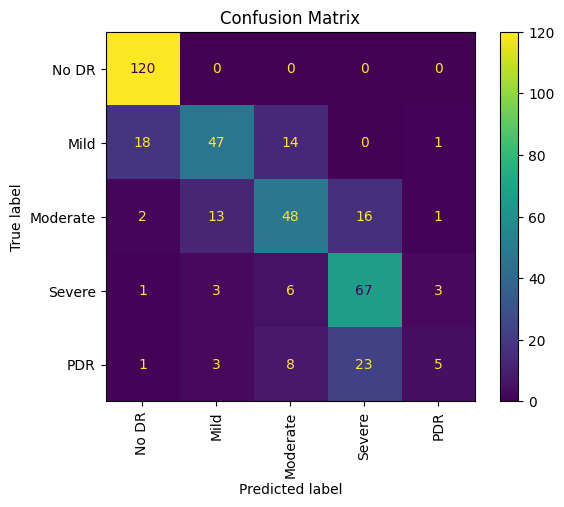

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\3581845782.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  8.11 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_pretrained_DR_Resize.csv


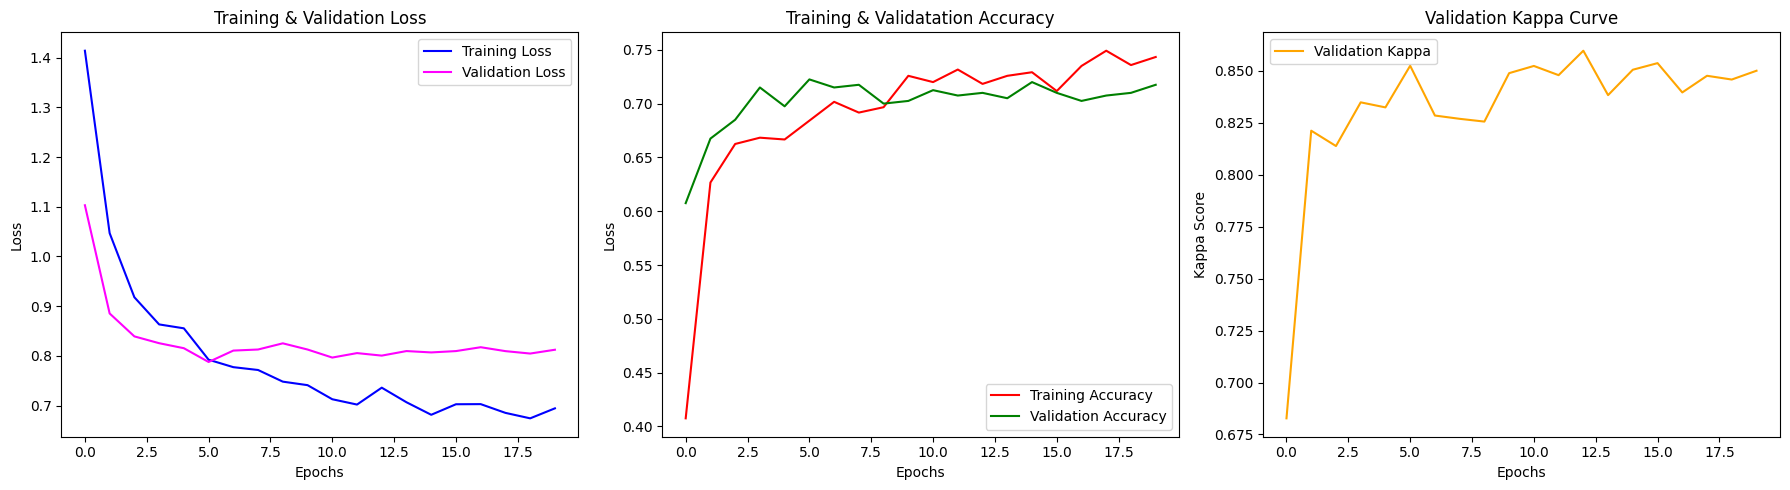

resnet18_pretrained_DR_Resize
Avg Kappa Score for 20 epochs:  0.832677840085813
All Kappa Scores: 
 [0.6827670896438804, 0.8212258796821793, 0.8138414367060884, 0.834870574233859, 0.8324387059335557, 0.8524923702950153, 0.828518571225274, 0.8269397173348716, 0.82560706401766, 0.8489208633093526, 0.8523878437047757, 0.8479557689509676, 0.8597208515437755, 0.8383355081919676, 0.8505648505648505, 0.853742472039002, 0.8396417220456516, 0.8476534296028881, 0.8458464173565515, 0.8500856653340948]


In [7]:
# b) Fine-tuning models using pretrained_DR_resized Models. 
# Resnet18
from MyModels import Resnet18_Single_Pretrained

# Selecting resnet18_pretrained Model, with Single image option
model_name = 'resnet18_pretrained_DR_Resize'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single_Pretrained()

# unfreezing all layers. 
for param in model.parameters():
    param.requires_grad = True
    
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()

Device: cuda


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:380: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary c

missing keys: ['classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias']
unexpected keys: []

Epoch 1/20
Training: 100%|██████████| 50/50 [00:16<00:00,  2.99 batch/s, lr=1.0e-04, Loss=1.2633]
[Train] Kappa: 0.4321 Accuracy: 0.3442 Precision: 0.3083 Recall: 0.3442 Loss: 1.4301
[Train] Class 0: Precision: 0.4922, Recall: 0.7028
[Train] Class 1: Precision: 0.1067, Recall: 0.0333
[Train] Class 2: Precision: 0.2432, Recall: 0.3333
[Train] Class 3: Precision: 0.3730, Recall: 0.1958
[Train] Class 4: Precision: 0.1603, Recall: 0.2083
Evaluating: 100%|██████████| 17/17 [00:02<00:00,  6.05 batch/s]
[Val] Kappa: 0.7923 Accuracy: 0.5100 Precision: 0.3491 Recall: 0.5100

Epoch 2/20
Training: 100%|██████████| 50/50 [00:16<00:00,  3.04 batch/s, lr=1.0e-04, Loss=0.9939]
[Train] Kappa: 0.7257 Accuracy: 0.5175 Precision: 0.4874 Recall: 0.5175 Loss: 1.1232
[Train] Class 0: Precision: 0.6845, Recall: 0.9583
[Train] Class 1: Precisio

<Figure size 600x500 with 0 Axes>

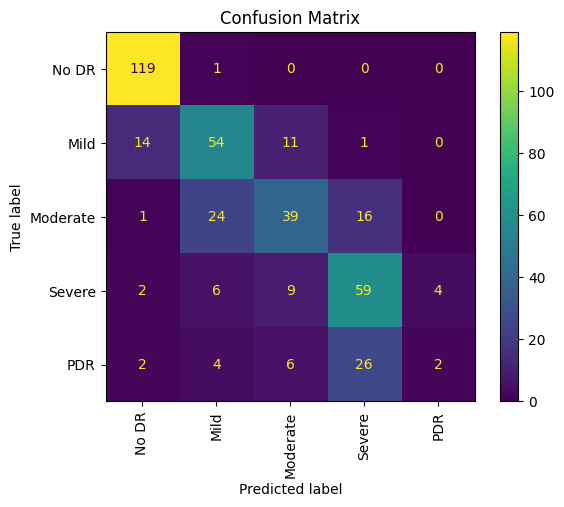

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\2828173217.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  6.15 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_vgg16_pretrained_DR_Resize.csv


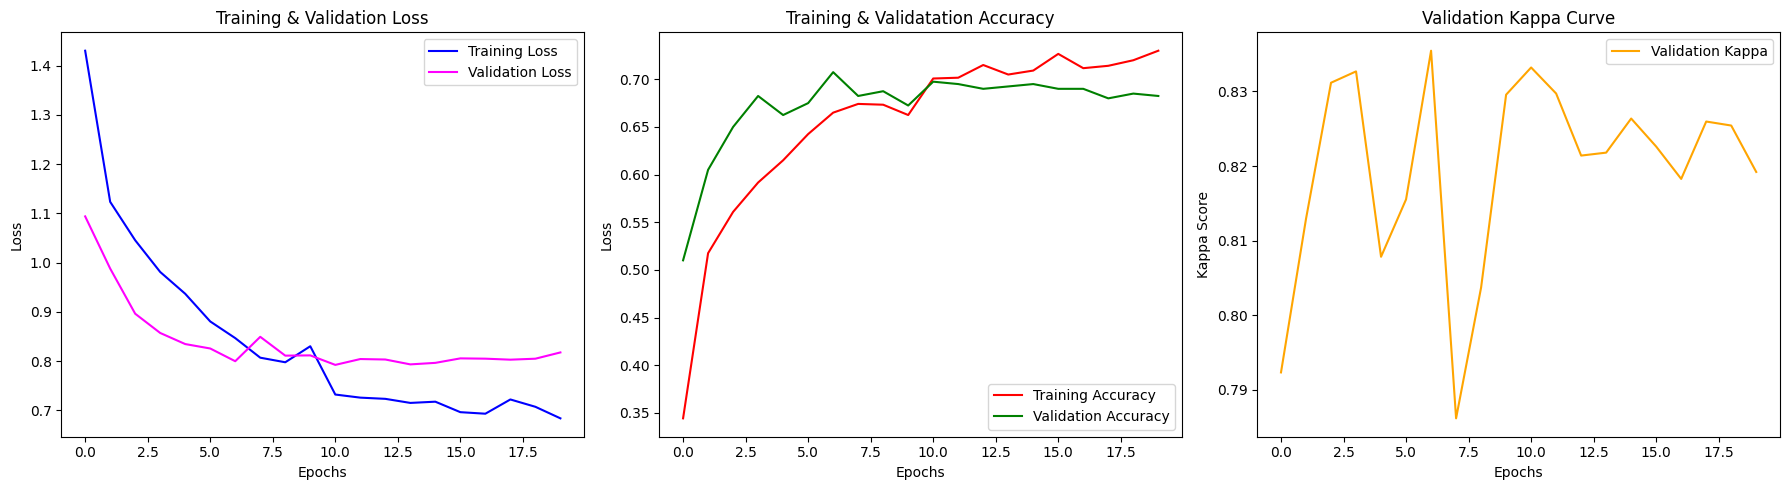

vgg16_pretrained_DR_Resize
Avg Kappa Score for 20 epochs:  0.8195692747809067
All Kappa Scores: 
 [0.7923363764947924, 0.8129205921938089, 0.831165034351703, 0.8326859874514491, 0.8078383715631171, 0.8155339805825242, 0.8354580492143493, 0.7861817075026633, 0.8037159124962542, 0.8295621510431972, 0.8332108743570904, 0.8297213622291022, 0.8214023225047773, 0.8217967599410898, 0.8263684520306063, 0.8226115118504342, 0.818274704422712, 0.8259656337200764, 0.8254291533313937, 0.8192065583369932]


In [8]:
# b) Fine-tuning models using pretrained_DR_resized Models. 
# Vgg16
from MyModels import VGG16_Single_Pretrained

# Selecting vgg16_pretrained Model, with Single image option
model_name = 'vgg16_pretrained_DR_Resize'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = VGG16_Single_Pretrained()

# unfreezing all layers. 
for param in model.parameters():
    param.requires_grad = True
    
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()

Device: cuda


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit

missing keys: ['fc.weight', 'fc.bias']
unexpected keys: ['layer1.2.conv1.weight', 'layer1.2.bn1.weight', 'layer1.2.bn1.bias', 'layer1.2.bn1.running_mean', 'layer1.2.bn1.running_var', 'layer1.2.bn1.num_batches_tracked', 'layer1.2.conv2.weight', 'layer1.2.bn2.weight', 'layer1.2.bn2.bias', 'layer1.2.bn2.running_mean', 'layer1.2.bn2.running_var', 'layer1.2.bn2.num_batches_tracked', 'layer2.2.conv1.weight', 'layer2.2.bn1.weight', 'layer2.2.bn1.bias', 'layer2.2.bn1.running_mean', 'layer2.2.bn1.running_var', 'layer2.2.bn1.num_batches_tracked', 'layer2.2.conv2.weight', 'layer2.2.bn2.weight', 'layer2.2.bn2.bias', 'layer2.2.bn2.running_mean', 'layer2.2.bn2.running_var', 'layer2.2.bn2.num_batches_tracked', 'layer2.3.conv1.weight', 'layer2.3.bn1.weight', 'layer2.3.bn1.bias', 'layer2.3.bn1.running_mean', 'layer2.3.bn1.running_var', 'layer2.3.bn1.num_batches_tracked', 'layer2.3.conv2.weight', 'layer2.3.bn2.weight', 'layer2.3.bn2.bias', 'layer2.3.bn2.running_mean', 'layer2.3.bn2.running_var', 'layer2

<Figure size 600x500 with 0 Axes>

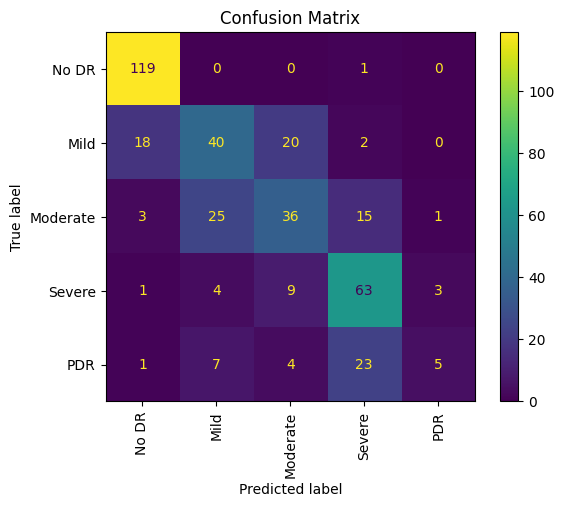

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\314885567.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu')

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  8.10 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet34_pretrained_DR_Resize.csv


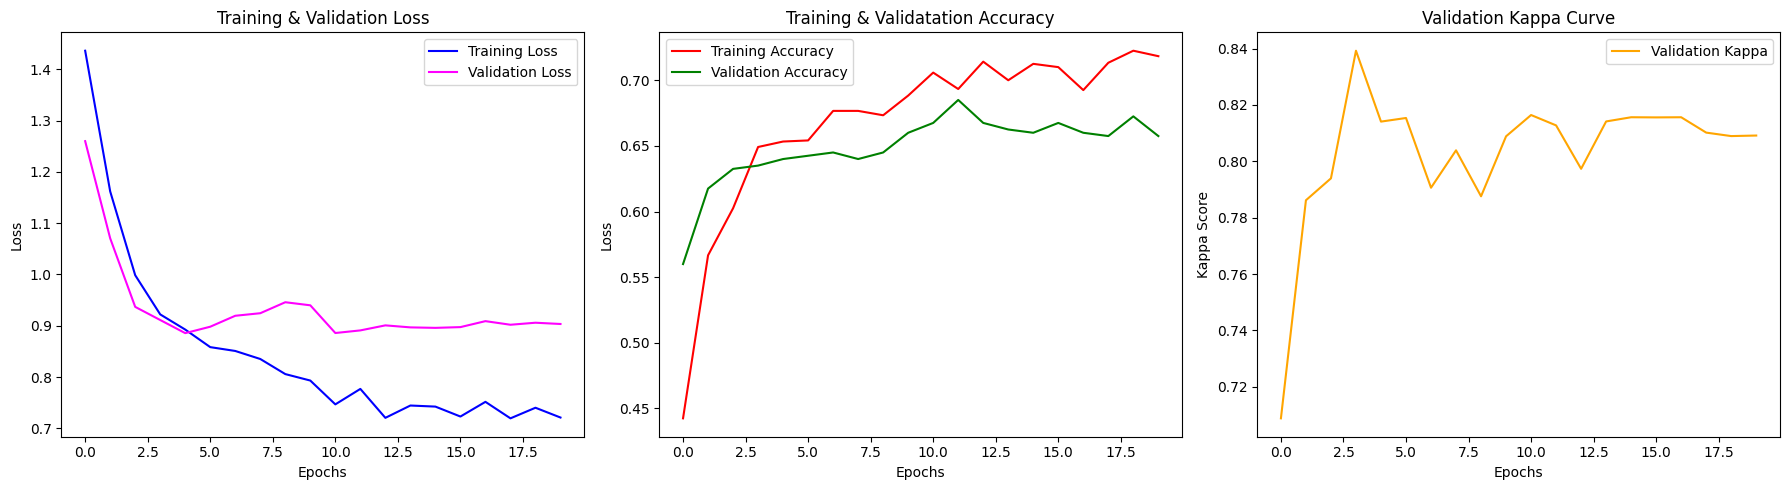

resnet34_pretrained_DR_Resize
Avg Kappa Score for 20 epochs:  0.8032018500951803
All Kappa Scores: 
 [0.7088048578526083, 0.7861705081921688, 0.7939385356181844, 0.8392145702902675, 0.8140674545978668, 0.8153491055972303, 0.7906100565135488, 0.8038789984078738, 0.7875722543352601, 0.8088531187122736, 0.8164023431918845, 0.8127208480565371, 0.7973261271511876, 0.8141237261375054, 0.8156119959822069, 0.8155590641596095, 0.8156119959822069, 0.8101631297820124, 0.8089308716187205, 0.8091274397244547]


In [9]:
# b) Fine-tuning models using pretrained_DR_resized Models. 
# resnet34
from MyModels import Resnet34_Single_Pretrained

# Selecting resnet34_pretrained Model, with Single image option
model_name = 'resnet34_pretrained_DR_Resize'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet34_Single_Pretrained()

# unfreezing all layers. 
for param in model.parameters():
    param.requires_grad = True
    
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()

Device: cuda
missing keys: ['fc.weight', 'fc.bias']
unexpected keys: []

Epoch 1/20

c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:182: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit


Training: 100%|██████████| 50/50 [00:08<00:00,  6.00 batch/s, lr=1.0e-04, Loss=1.2973]
[Train] Kappa: 0.4098 Accuracy: 0.3875 Precision: 0.3955 Recall: 0.3875 Loss: 1.4895
[Train] Class 0: Precision: 0.4337, Recall: 0.8000
[Train] Class 1: Precision: 0.5000, Recall: 0.0083
[Train] Class 2: Precision: 0.3534, Recall: 0.1708
[Train] Class 3: Precision: 0.4077, Recall: 0.4875
[Train] Class 4: Precision: 0.1318, Recall: 0.1417
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  9.01 batch/s]
[Val] Kappa: 0.4980 Accuracy: 0.4700 Precision: 0.4237 Recall: 0.4700

Epoch 2/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.35 batch/s, lr=1.0e-04, Loss=1.1388]
[Train] Kappa: 0.7009 Accuracy: 0.5467 Precision: 0.4935 Recall: 0.5467 Loss: 1.2066
[Train] Class 0: Precision: 0.5805, Recall: 0.9917
[Train] Class 1: Precision: 0.6061, Recall: 0.1667
[Train] Class 2: Precision: 0.4793, Recall: 0.3375
[Train] Class 3: Precision: 0.5115, Recall: 0.7417
[Train] Class 4: Precision: 0.0000, Recall: 0.0000

<Figure size 600x500 with 0 Axes>

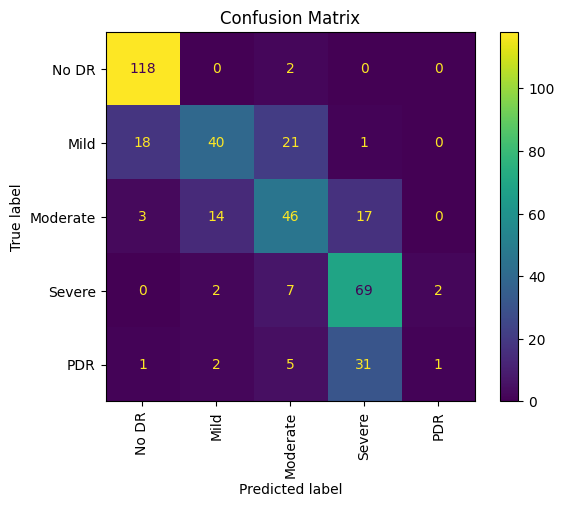

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\865489318.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu')

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  7.62 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_pretrainedDRresize_with_SpatialAttention.csv


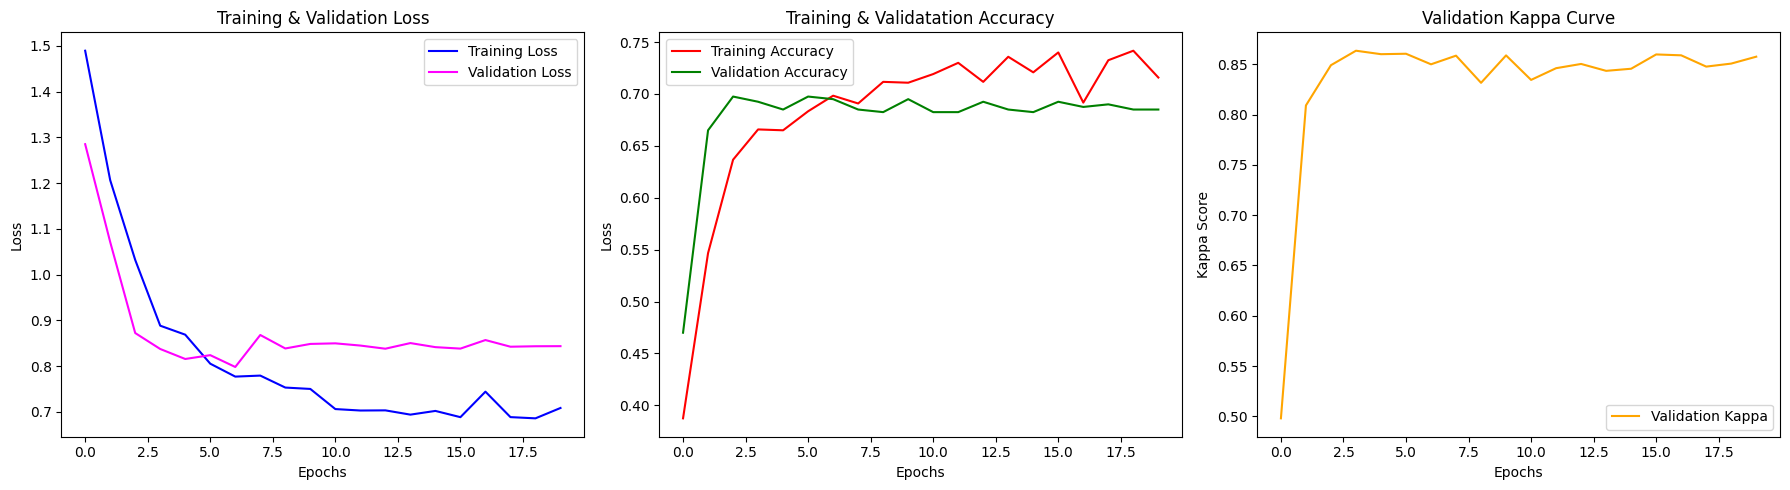

resnet18_pretrainedDRresize_with_SpatialAttention
Avg Kappa Score for 20 epochs:  0.8317706898647147
All Kappa Scores: 
 [0.49797281182923914, 0.8091603053435115, 0.8491879350348028, 0.8635841470419299, 0.8601348443551857, 0.8605692818956798, 0.8500671341190511, 0.8586674358234785, 0.8316571928290337, 0.8589205614238171, 0.8345534407027818, 0.8461984910040627, 0.8504304684079965, 0.8435672514619883, 0.8456610366919045, 0.8598809350951067, 0.859002169197397, 0.8477785870356883, 0.8507788615518999, 0.8576409064497386]


In [10]:
# c) Attention Mechanisms
# Choosing Resnet18 and trying different attention mechanisms on the pretrained DR resized models (pretrained_DR_resize/pretrained/resnet18.pth)
# and fine-tuning again as part (b)

# Spacial Attention 
from MyModels import Resnet18_Single_Pretrained_SpacialAttention

# Selecting resnet18 Model, with Single image option and creating train, test, and validation DS and loaders.
model_name = 'resnet18_pretrainedDRresize_with_SpatialAttention'

# Incorporating Spatial Attention
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single_Pretrained_SpacialAttention()
for param in model.parameters():
    param.requires_grad = True
# for param in model.fc.parameters():
#     param.requires_grad = True
    
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()


Device: cuda
missing keys: ['fc.weight', 'fc.bias']
unexpected keys: []


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:212: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit


Epoch 1/20
Training: 100%|██████████| 50/50 [00:08<00:00,  6.17 batch/s, lr=1.0e-04, Loss=1.1687]
[Train] Kappa: 0.1057 Accuracy: 0.3383 Precision: 0.3403 Recall: 0.3383 Loss: 1.4297
[Train] Class 0: Precision: 0.3723, Recall: 0.9194
[Train] Class 1: Precision: 0.2134, Recall: 0.2250
[Train] Class 2: Precision: 0.2581, Recall: 0.0333
[Train] Class 3: Precision: 0.6000, Recall: 0.0500
[Train] Class 4: Precision: 0.1429, Recall: 0.0083
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  9.02 batch/s]
[Val] Kappa: 0.2480 Accuracy: 0.4200 Precision: 0.4380 Recall: 0.4200

Epoch 2/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.30 batch/s, lr=1.0e-04, Loss=0.9610]
[Train] Kappa: 0.5653 Accuracy: 0.5575 Precision: 0.5050 Recall: 0.5575 Loss: 1.1659
[Train] Class 0: Precision: 0.6610, Recall: 0.9694
[Train] Class 1: Precision: 0.4423, Recall: 0.6542
[Train] Class 2: Precision: 0.3983, Recall: 0.1958
[Train] Class 3: Precision: 0.5928, Recall: 0.4792
[Train] Class 4: Precision: 0.2000, Rec

<Figure size 600x500 with 0 Axes>

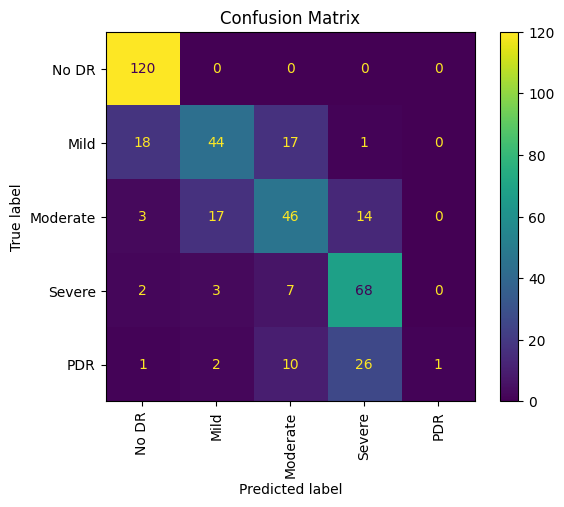

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\1871819837.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  8.43 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_pretrainedDRresize_with_ChannelAttention.csv


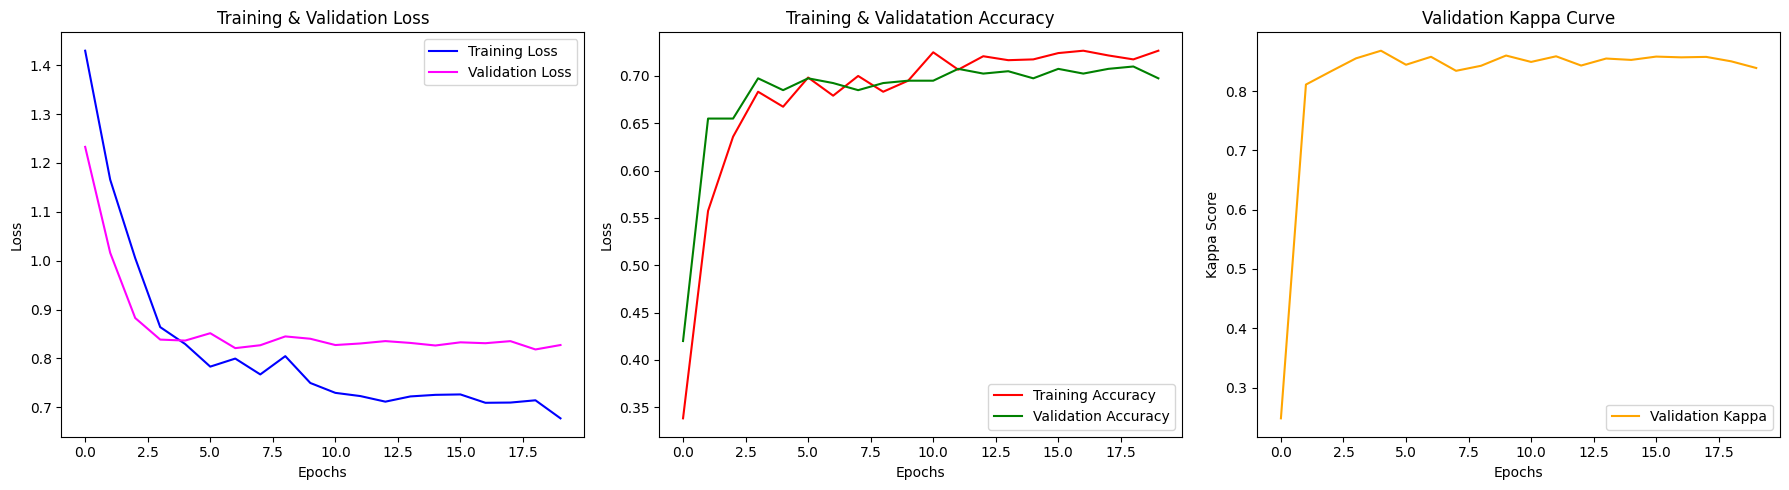

resnet18_pretrainedDRresize_with_ChannelAttention
Avg Kappa Score for 20 epochs:  0.8188502176079858
All Kappa Scores: 
 [0.248046875, 0.8110938163294185, 0.8334504567814476, 0.8553008595988538, 0.8681948424068768, 0.8445219412961349, 0.8579298347347057, 0.8342823769893415, 0.8428044280442805, 0.8600583090379008, 0.8492907801418439, 0.8587735987121323, 0.8431952662721893, 0.8549977918445458, 0.8526812021213906, 0.8582758114260538, 0.857017157941047, 0.8577745025792188, 0.8502729016079068, 0.8390415992944289]


In [11]:
# c) Attention Mechanisms
# Choosing Resnet18 and trying different attention mechanisms on the pretrained DR resized models (pretrained_DR_resize/pretrained/resnet18.pth)
# and fine-tuning again as part (b)

# Channel Attention
from MyModels import Resnet18_Single_Pretrained_ChannelAttention

# Selecting resnet18 Model, with Single image option and creating train, test, and validation DS and loaders.
model_name = 'resnet18_pretrainedDRresize_with_ChannelAttention'

# Incorporating Channel Attention
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single_Pretrained_ChannelAttention()
for param in model.parameters():
    param.requires_grad = True
# for param in model.fc.parameters():
#     param.requires_grad = True
    
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()


Device: cuda
missing keys: ['fc.weight', 'fc.bias']
unexpected keys: []


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit


Epoch 1/20
Training: 100%|██████████| 50/50 [00:08<00:00,  6.09 batch/s, lr=1.0e-04, Loss=1.0723]
[Train] Kappa: 0.4576 Accuracy: 0.4317 Precision: 0.4225 Recall: 0.4317 Loss: 1.3920
[Train] Class 0: Precision: 0.6029, Recall: 0.6833
[Train] Class 1: Precision: 0.3609, Recall: 0.4000
[Train] Class 2: Precision: 0.2986, Recall: 0.1792
[Train] Class 3: Precision: 0.4565, Recall: 0.4375
[Train] Class 4: Precision: 0.1842, Recall: 0.2333
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  9.09 batch/s]
[Val] Kappa: 0.7148 Accuracy: 0.5750 Precision: 0.5585 Recall: 0.5750

Epoch 2/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.61 batch/s, lr=1.0e-04, Loss=0.8067]
[Train] Kappa: 0.7414 Accuracy: 0.6067 Precision: 0.5645 Recall: 0.6067 Loss: 1.0631
[Train] Class 0: Precision: 0.7242, Recall: 0.9556
[Train] Class 1: Precision: 0.5968, Recall: 0.6167
[Train] Class 2: Precision: 0.4132, Recall: 0.2083
[Train] Class 3: Precision: 0.5260, Recall: 0.7583
[Train] Class 4: Precision: 0.4000, Rec

<Figure size 600x500 with 0 Axes>

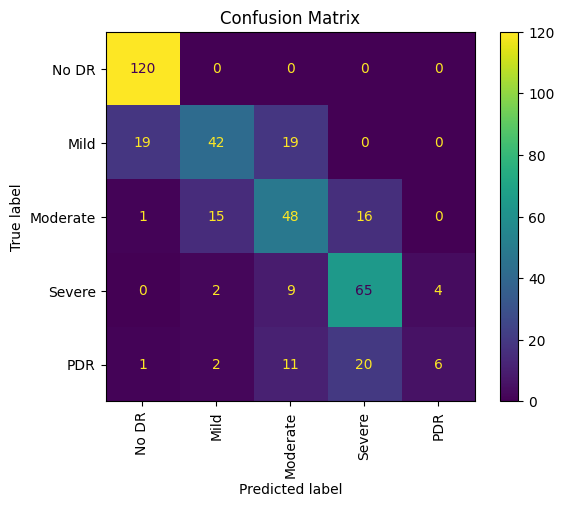

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\3046633927.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:01<00:00,  8.63 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_pretrainedDRresize_with_SelfAttention.csv


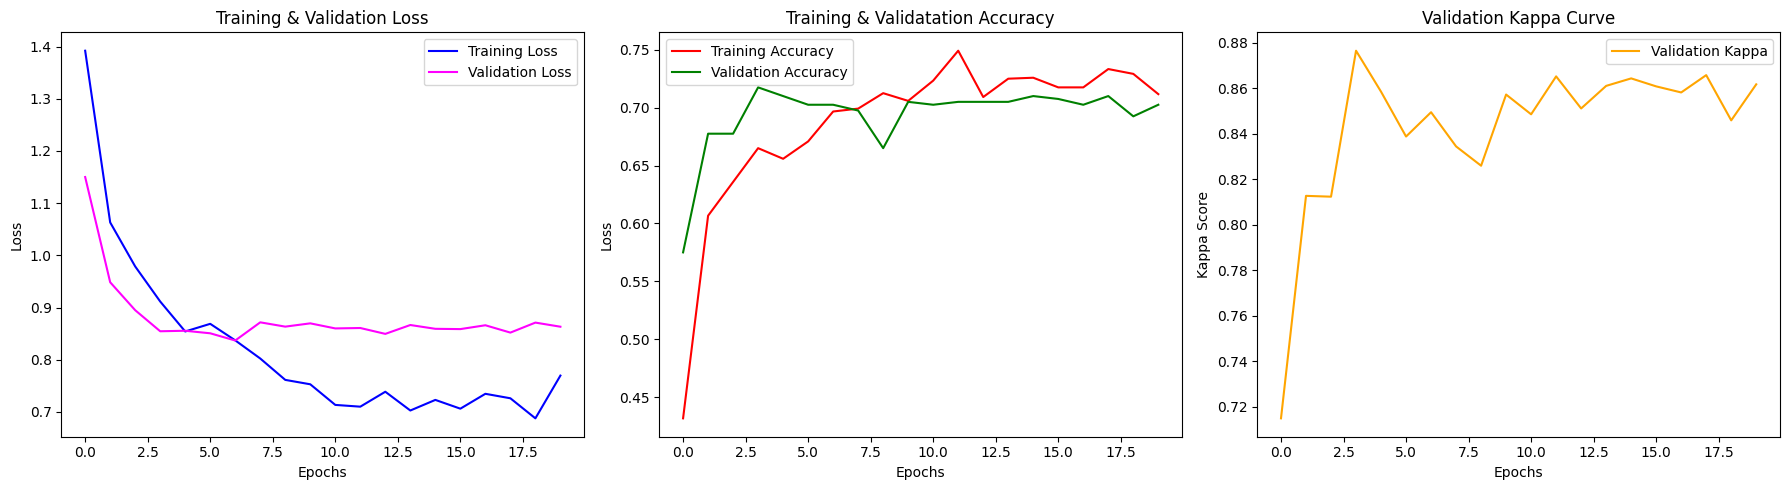

resnet18_pretrainedDRresize_with_SelfAttention
Avg Kappa Score for 20 epochs:  0.8431499787784607
All Kappa Scores: 
 [0.71481383681014, 0.8126633749636945, 0.8123014727115219, 0.8764986277625306, 0.8584700246770214, 0.838755707762557, 0.8494499131441806, 0.8344079718640094, 0.8259215915740199, 0.8572228443449048, 0.8485283560660445, 0.8652099886492621, 0.8511005610703496, 0.8610323312535451, 0.8643273192214803, 0.860810615894995, 0.8581405499781755, 0.8657621247113164, 0.8458710407239819, 0.8617113223854798]


In [12]:
# c) Attention Mechanisms
# Choosing Resnet18 and trying different attention mechanisms on the pretrained DR resized models (pretrained_DR_resize/pretrained/resnet18.pth)
# and fine-tuning again as part (b)

# Self Attention
from MyModels import Resnet18_Single_Pretrained_SelfAttention

# Selecting resnet18 Model, with Single image option and creating train, test, and validation DS and loaders.
model_name = 'resnet18_pretrainedDRresize_with_SelfAttention'

# Incorporating Self Attention 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single_Pretrained_SelfAttention()
for param in model.parameters():
    param.requires_grad = True
# for param in model.fc.parameters():
#     param.requires_grad = True
    
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

del model
torch.cuda.empty_cache()


In [13]:
# # d) Ensemble Learning
# # Choosing the following models from part (b): 
# #   - DeepDRiD_resnet18_pretrained_DR_Resize.pth
# #   - DeepDRiD_vgg16_pretrained_DR_Resize.pth
# #   - DeepDRiD_resnet34_pretrained_DR_Resize.pth

from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from Ensembles import max_voting, weighted_average, preds_to_csv
from MyModels import Resnet18_Single_Pretrained, VGG16_Single_Pretrained, Resnet34_Single_Pretrained

# Load Base Models and get Validation DS Predictions for Ensemblers. 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_resnet18 = Resnet18_Single_Pretrained().to(device)
model_resnet18.load_state_dict(torch.load('./DeepDRiD_resnet18_pretrained_DR_Resize.pth', map_location=device))

model_vgg16 = VGG16_Single_Pretrained().to(device)
model_vgg16.load_state_dict(torch.load('./DeepDRiD_vgg16_pretrained_DR_Resize.pth', map_location=device))

model_resnet34 = Resnet34_Single_Pretrained().to(device)
model_resnet34.load_state_dict(torch.load('./DeepDRiD_resnet34_pretrained_DR_Resize.pth', map_location=device))

mode = 'single'
val_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/val.csv', './DeepDRiD/val/', transform_test, mode, test=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

prediction_paths = ['./model_resnet18_val_predictions_tmp.csv', './model_vgg16_val_predictions_tmp.csv', './model_resnet34_val_predictions_tmp.csv' ]
models = [model_resnet18, model_vgg16, model_resnet34]

# Getting predictions using the evaluate model function on the Validation Dataset. 
for i in range(len(prediction_paths)): 
    evaluate_model(models[i], val_loader, device, test_only=True, prediction_path=prediction_paths[i])
    
resnet18_val_preds_df = pd.read_csv(prediction_paths[0])
vgg16_val_preds_df = pd.read_csv(prediction_paths[1])
resnet34_val_preds_df = pd.read_csv(prediction_paths[2])

resnet18_val_preds = resnet18_val_preds_df['TARGET'].values
vgg16_val_preds = vgg16_val_preds_df['TARGET'].values
resnet34_val_preds = resnet34_val_preds_df['TARGET'].values

# Get Base Model Predictions on the test dataset (kaggle Submissions files).
resnet18_test_preds_df = pd.read_csv('./test_predictions_DeepDRiD_resnet18_pretrained_DR_Resize.csv')
vgg16_test_preds_df = pd.read_csv('./test_predictions_DeepDRiD_vgg16_pretrained_DR_Resize.csv')
resnet34_test_preds_df = pd.read_csv('./test_predictions_DeepDRiD_resnet34_pretrained_DR_Resize.csv')

resnet18_test_preds = resnet18_test_preds_df['TARGET'].values
vgg16_test_preds = vgg16_test_preds_df['TARGET'].values
resnet34_test_preds = resnet34_test_preds_df['TARGET'].values

# Stacked Features and Labels (from val.csv -> patient_DR_Level)
stacked_features = np.column_stack((resnet34_val_preds, vgg16_val_preds, resnet34_val_preds))
stacked_labels = pd.read_csv('./DeepDRiD/val.csv')['patient_DR_Level'].values

# Stacked Features from Test dataset to make predictions on
stacked_test_features = np.column_stack((resnet18_test_preds, vgg16_test_preds, resnet34_test_preds))


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:155: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit

missing keys: ['fc.weight', 'fc.bias']
unexpected keys: []


c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:380: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed

missing keys: ['classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias']
unexpected keys: []


d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\MyModels.py:312: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('pretrained_

missing keys: ['fc.weight', 'fc.bias']
unexpected keys: ['layer1.2.conv1.weight', 'layer1.2.bn1.weight', 'layer1.2.bn1.bias', 'layer1.2.bn1.running_mean', 'layer1.2.bn1.running_var', 'layer1.2.bn1.num_batches_tracked', 'layer1.2.conv2.weight', 'layer1.2.bn2.weight', 'layer1.2.bn2.bias', 'layer1.2.bn2.running_mean', 'layer1.2.bn2.running_var', 'layer1.2.bn2.num_batches_tracked', 'layer2.2.conv1.weight', 'layer2.2.bn1.weight', 'layer2.2.bn1.bias', 'layer2.2.bn1.running_mean', 'layer2.2.bn1.running_var', 'layer2.2.bn1.num_batches_tracked', 'layer2.2.conv2.weight', 'layer2.2.bn2.weight', 'layer2.2.bn2.bias', 'layer2.2.bn2.running_mean', 'layer2.2.bn2.running_var', 'layer2.2.bn2.num_batches_tracked', 'layer2.3.conv1.weight', 'layer2.3.bn1.weight', 'layer2.3.bn1.bias', 'layer2.3.bn1.running_mean', 'layer2.3.bn1.running_var', 'layer2.3.bn1.num_batches_tracked', 'layer2.3.conv2.weight', 'layer2.3.bn2.weight', 'layer2.3.bn2.bias', 'layer2.3.bn2.running_mean', 'layer2.3.bn2.running_var', 'layer2

In [14]:
# (d) Ensemble Methods

# Stacking
# Get base models and their predictions on the validation set. 
# Create stacked features using above predictions. 
# Train Meta Learner on the stacked features and get a Model. 
# Using Base Model's predictions on the Test Dataset (CSVs for Kaggle), and the above Meta Learner, make predictions of the Test Dataset (create a new Kaggle submission)

# Meta Model
meta_model_stacking = LogisticRegression()
meta_model_stacking.fit(stacked_features, stacked_labels)

# Making Predictions on the Stacked Features
stacked_preds_val_set = meta_model_stacking.predict(stacked_features)
print('Stacking Cohen Kappa on Validation Set:', cohen_kappa_score(stacked_labels, stacked_preds_val_set))

stacked_preds_test_set = meta_model_stacking.predict(stacked_test_features)

preds_to_csv('./test_predictions_DeepDRiD_ensemble_stacking.csv', resnet18_test_preds_df['ID'], stacked_preds_test_set)

# -----------------------

# Bagging 
base_learner = DecisionTreeClassifier(max_depth=5, random_state=42) 
meta_model_bagging = BaggingClassifier(estimator=base_learner, n_estimators=10, random_state=42)

meta_model_bagging.fit(stacked_features, stacked_labels)

bagged_preds_val_set = meta_model_bagging.predict(stacked_features)
print('Bagging Cohen Kappa on Validation Set:', cohen_kappa_score(stacked_labels, bagged_preds_val_set))

bagged_preds_test_set = meta_model_bagging.predict(stacked_test_features)

preds_to_csv('./test_predictions_DeepDRiD_ensemble_bagging.csv', resnet18_test_preds_df['ID'], bagged_preds_test_set)

# -----------------------

# Boosting
from sklearn.ensemble import AdaBoostClassifier

base_learner = DecisionTreeClassifier(max_depth=5, random_state=42)
meta_model_boosting = AdaBoostClassifier(estimator=base_learner, n_estimators=50, random_state=42)

meta_model_boosting.fit(stacked_features, stacked_labels)

# Predict on the validation set
boosted_preds_val_set = meta_model_boosting.predict(stacked_features)
print('Boosting Cohen Kappa on Validation Set:', cohen_kappa_score(stacked_labels, boosted_preds_val_set))

boosted_preds_test_set = meta_model_boosting.predict(stacked_test_features)

preds_to_csv('./test_predictions_DeepDRiD_ensemble_boosting.csv', resnet18_test_preds_df['ID'], boosted_preds_test_set)

# -----------------------

# Max Voting
maxvoting_preds_val_set = max_voting(resnet18_val_preds, vgg16_val_preds, resnet34_val_preds)
print('Max Voting Cohen Kappa on Validation Set:', cohen_kappa_score(stacked_labels, maxvoting_preds_val_set))

maxvoting_preds_test_set = max_voting(resnet18_test_preds, vgg16_test_preds, resnet34_test_preds)
preds_to_csv('./test_predictions_DeepDRiD_ensemble_maxvoting.csv', resnet18_test_preds_df['ID'], maxvoting_preds_test_set)

# -----------------------

# Weighted Average
model_weights = [0.4, 0.3, 0.3]
model_val_preds = [resnet18_val_preds, vgg16_val_preds, resnet34_val_preds]
weightedavg_preds_val_set = weighted_average(model_val_preds, model_weights)
print('Max Voting Cohen Kappa on Validation Set:', cohen_kappa_score(stacked_labels, weightedavg_preds_val_set))

model_test_preds = [resnet18_test_preds, vgg16_test_preds, resnet34_test_preds]
weightedavg_preds_test_set = weighted_average(model_test_preds, model_weights)
preds_to_csv('./test_predictions_DeepDRiD_ensemble_weightedavg.csv', resnet18_test_preds_df['ID'], weightedavg_preds_test_set)

# -----------------------

Stacking Cohen Kappa on Validation Set: 0.5857795172863666
Saved predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_ensemble_stacking.csv
Bagging Cohen Kappa on Validation Set: 0.6315617867623085
Saved predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_ensemble_bagging.csv
Boosting Cohen Kappa on Validation Set: 0.6315617867623085
Saved predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_ensemble_boosting.csv
Max Voting Cohen Kappa on Validation Set: 0.6040575916230366
Saved predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_ensemble_maxvoting.csv
Max Voting Cohen Kappa on Validation Set: 0.6082272282076395
Saved predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_ensemble_

c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


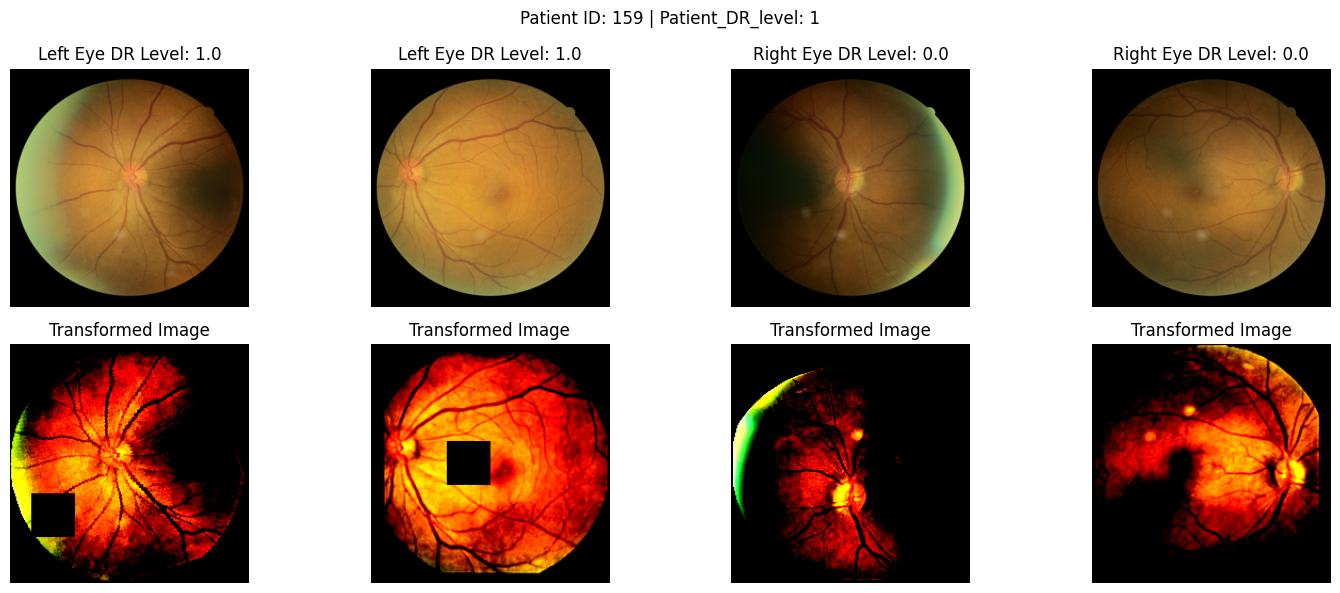

c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Device: cuda

Epoch 1/20
Training: 100%|██████████| 50/50 [00:14<00:00,  3.39 batch/s, lr=1.0e-04, Loss=1.3326]
[Train] Kappa: 0.3565 Accuracy: 0.3742 Precision: 0.4082 Recall: 0.3742 Loss: 1.4821
[Train] Class 0: Precision: 0.7207, Recall: 0.5806
[Train] Class 1: Precision: 0.3131, Recall: 0.2583
[Train] Class 2: Precision: 0.3053, Recall: 0.1667
[Train] Class 3: Precision: 0.2888, Recall: 0.5042
[Train] Class 4: Precision: 0.1049, Recall: 0.1417
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  8.57 batch/s]
[Val] Kappa: 0.6233 Accuracy: 0.5050 Precision: 0.3376 Recall: 0.5050

Epoch 2/20
Training: 100%|██████████| 50/50 [00:14<00:00,  3.39 batch/s, lr=1.0e-04, Loss=0.9269]
[Train] Kappa: 0.6639 Accuracy: 0.5525 Precision: 0.5295 Recall: 0.5525 Loss: 1.1867
[Train] Class 0: Precision: 0.7918, Recall: 0.9611
[Train] Class 1: Precision: 0.4425, Recall: 0.4167
[Train] Class 2: Precision: 0.4098, Recall: 0.2083
[Train] Class 3: Precision: 0.4016, Recall: 0.6375
[Train] Class 4: Precision

<Figure size 600x500 with 0 Axes>

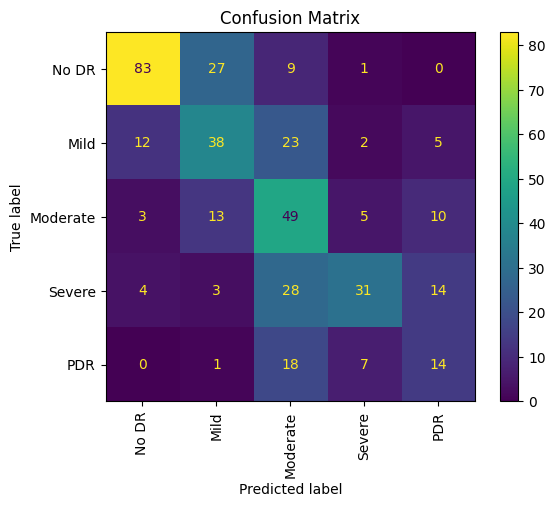

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\3781350300.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu'

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  8.05 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_with_ADVPreprocessing.csv


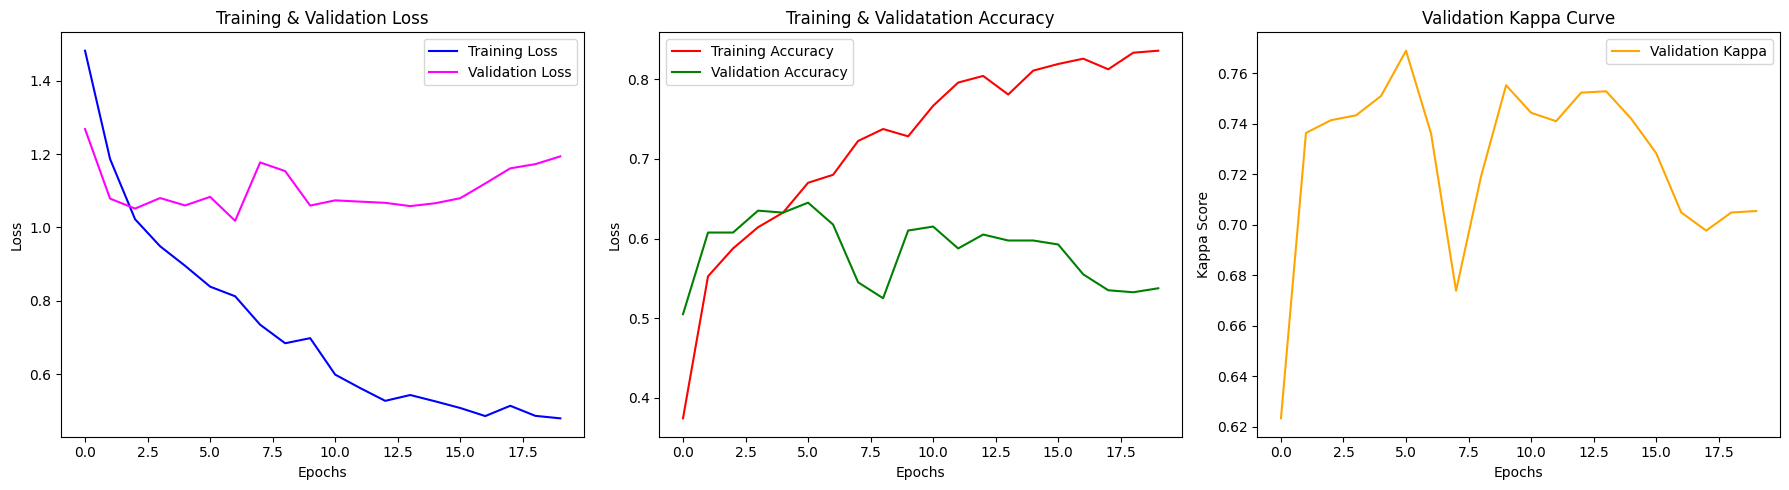

resnet18
Avg Kappa Score for 20 epochs:  0.7260474724199463
All Kappa Scores: 
 [0.6233230134158927, 0.736266739546324, 0.7413201591875943, 0.7432413102560436, 0.7508800433252099, 0.7688207861425717, 0.7360604833265829, 0.6738197424892705, 0.7191280392861421, 0.7551487414187643, 0.7442508710801394, 0.7409180512531681, 0.7522236340533672, 0.7527632344386271, 0.741907261592301, 0.72826891751814, 0.7048246928378783, 0.6976273148148149, 0.7047837954316909, 0.7053726169844021]


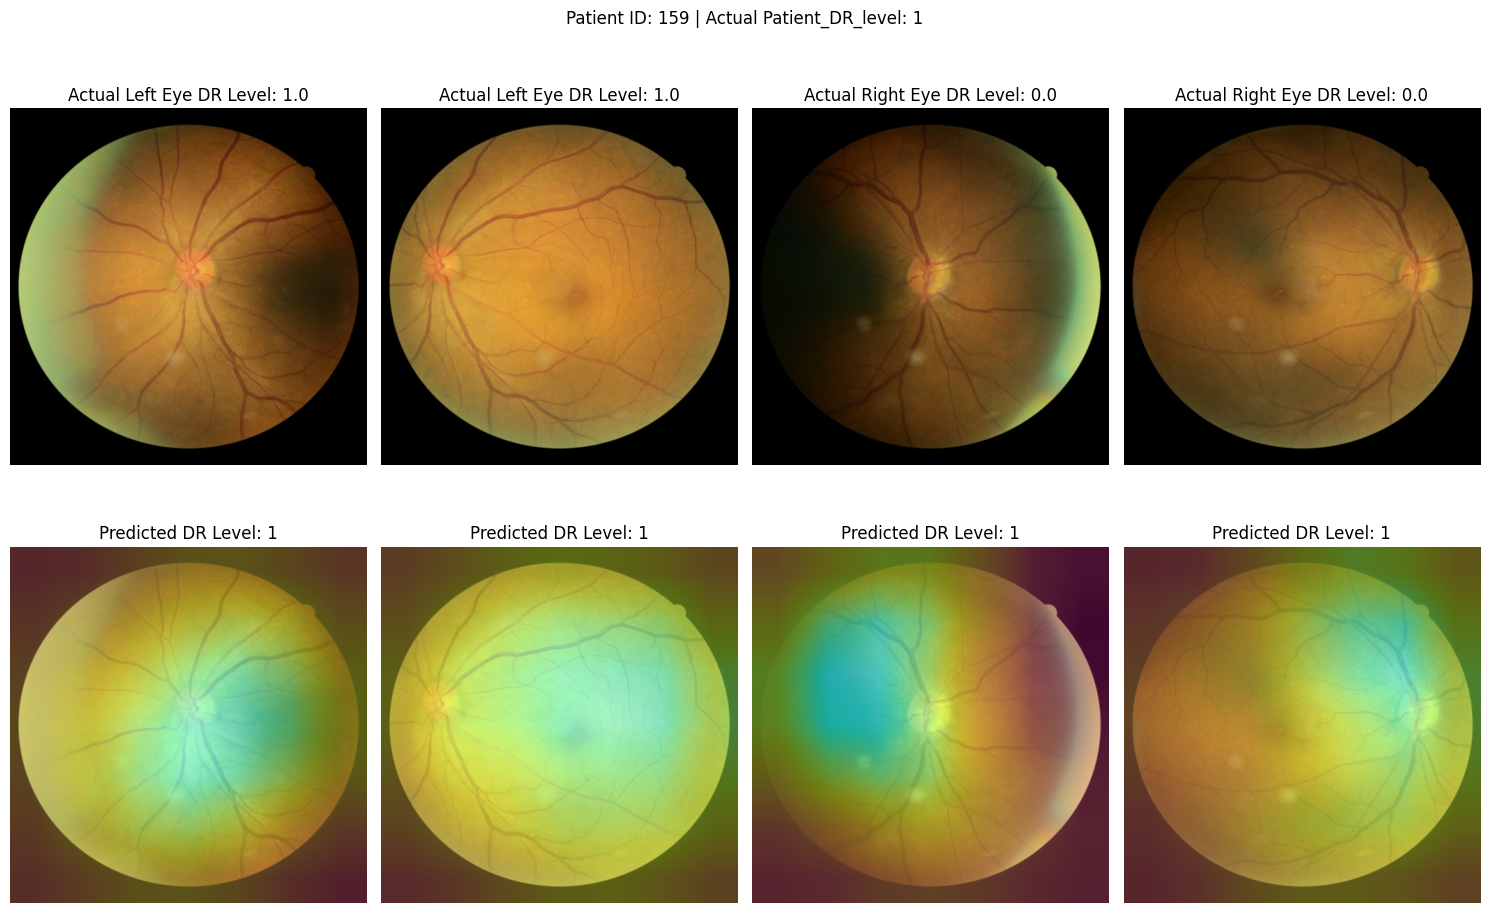

In [18]:
# d) Applying Different preprocessing techniques, like Ben Graham's, CLAHE, Sharpening, Circular Cropping,
# Gaussian Blur and training Resnet18 model from (a).

# Ben Graham's with Sharpening, GaussianBlur, and CircularCrop
from Augmentations import EnhancedBenGrahamTransform, CircleCropTransform

transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((210, 210)),
    SLORandomPad((224, 224)), 
    FundRandomRotate(prob=0.5, degree=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    EnhancedBenGrahamTransform(), 
    CircleCropTransform(), 
    transforms.GaussianBlur(kernel_size=(3, 5), sigma=(0.1, 1.0)),
    transforms.ToTensor(),
    CutOut(mask_size=40, p=0.5),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# using 'single' mode.
mode = 'single'
train_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/train.csv', './DeepDRiD/train/', transform_train, mode)
val_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/val.csv', './DeepDRiD/val/', transform_test, mode)
test_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/test.csv', './DeepDRiD/test/', transform_test, mode, test=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualizing how the transformations look
train_df = pd.read_csv('./DeepDRiD/train.csv') 
images = './DeepDRiD/train/'
random_patient = random.choice(train_df['patient_id'].unique()) 

plotPatientEyeImgsWithLabels(train_df, random_patient, images, transform_train)

# Selecting resnet18 Model, with Single image option
model_name = 'resnet18'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}_with_ADVPreprocessing.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}_with_ADVPreprocessing.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

plotRandomPatientEyeImagesWithGRADCam(train_df, random_patient, images, transform_train, model)

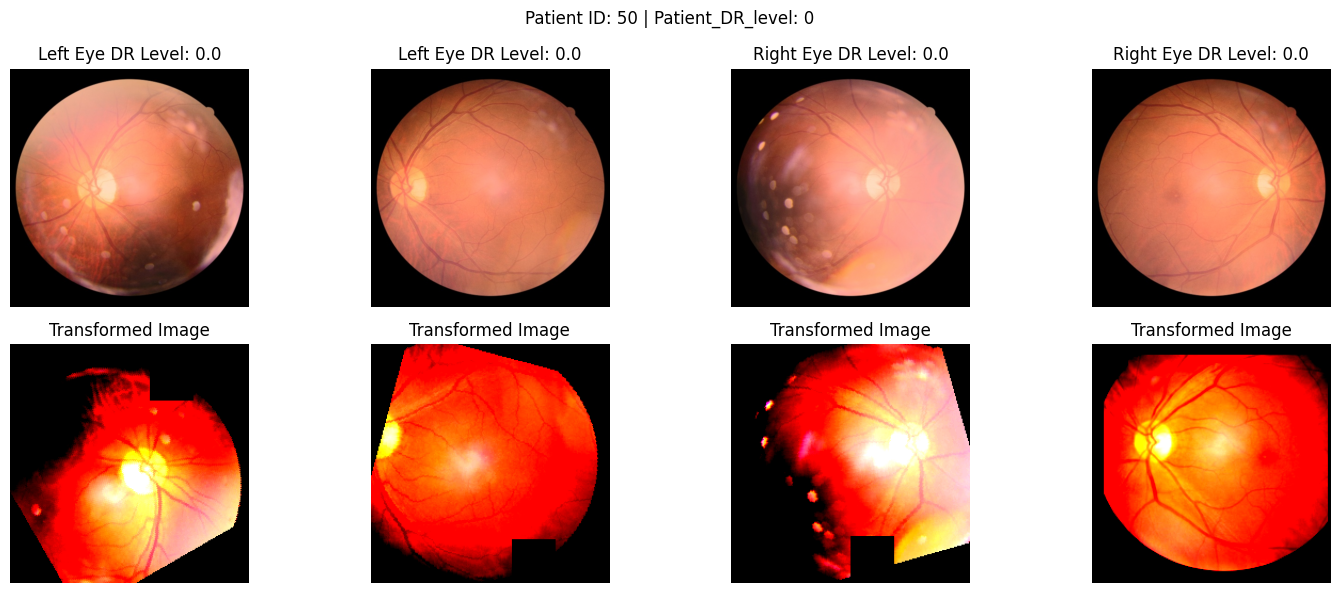

c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Device: cuda

Epoch 1/20
Training: 100%|██████████| 50/50 [00:08<00:00,  5.93 batch/s, lr=1.0e-04, Loss=1.3112]
[Train] Kappa: 0.3155 Accuracy: 0.3825 Precision: 0.3475 Recall: 0.3825 Loss: 1.4291
[Train] Class 0: Precision: 0.5142, Recall: 0.7556
[Train] Class 1: Precision: 0.2490, Recall: 0.2542
[Train] Class 2: Precision: 0.2756, Recall: 0.2583
[Train] Class 3: Precision: 0.3791, Recall: 0.2417
[Train] Class 4: Precision: 0.1250, Recall: 0.0500
Evaluating: 100%|██████████| 17/17 [00:01<00:00,  8.58 batch/s]
[Val] Kappa: 0.7034 Accuracy: 0.5825 Precision: 0.5024 Recall: 0.5825

Epoch 2/20
Training: 100%|██████████| 50/50 [00:07<00:00,  6.42 batch/s, lr=1.0e-04, Loss=1.0845]
[Train] Kappa: 0.6704 Accuracy: 0.5333 Precision: 0.4975 Recall: 0.5333 Loss: 1.1532
[Train] Class 0: Precision: 0.7923, Recall: 0.9750
[Train] Class 1: Precision: 0.4107, Recall: 0.3833
[Train] Class 2: Precision: 0.3019, Recall: 0.2000
[Train] Class 3: Precision: 0.3989, Recall: 0.6083
[Train] Class 4: Precision

<Figure size 600x500 with 0 Axes>

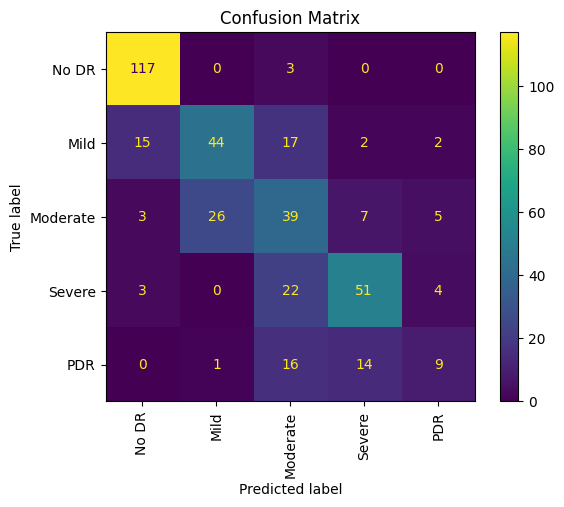

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\289368530.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu')

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  7.57 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_with_ORDPreprocessing.csv


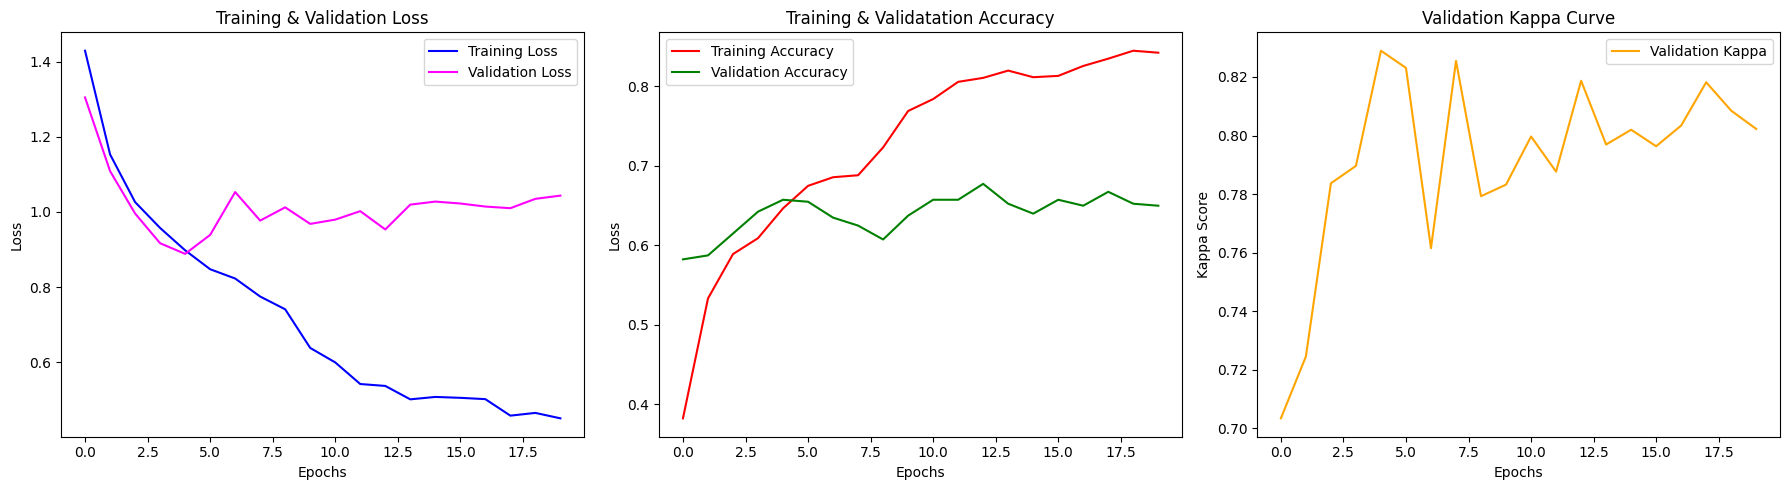

resnet18
Avg Kappa Score for 20 epochs:  0.7918155621278066
All Kappa Scores: 
 [0.7033664459161149, 0.7244984458886691, 0.7836869661063653, 0.7896202902800176, 0.8289766407119021, 0.8230965185394848, 0.7615003538570417, 0.8254910272714427, 0.7792706333973128, 0.7832227086569693, 0.7996565540927304, 0.7876557191392979, 0.8187102131192914, 0.7969187675070027, 0.8019732205778717, 0.7963354474982383, 0.8034066713981547, 0.8181945809349993, 0.8084864018225829, 0.8022436358406443]


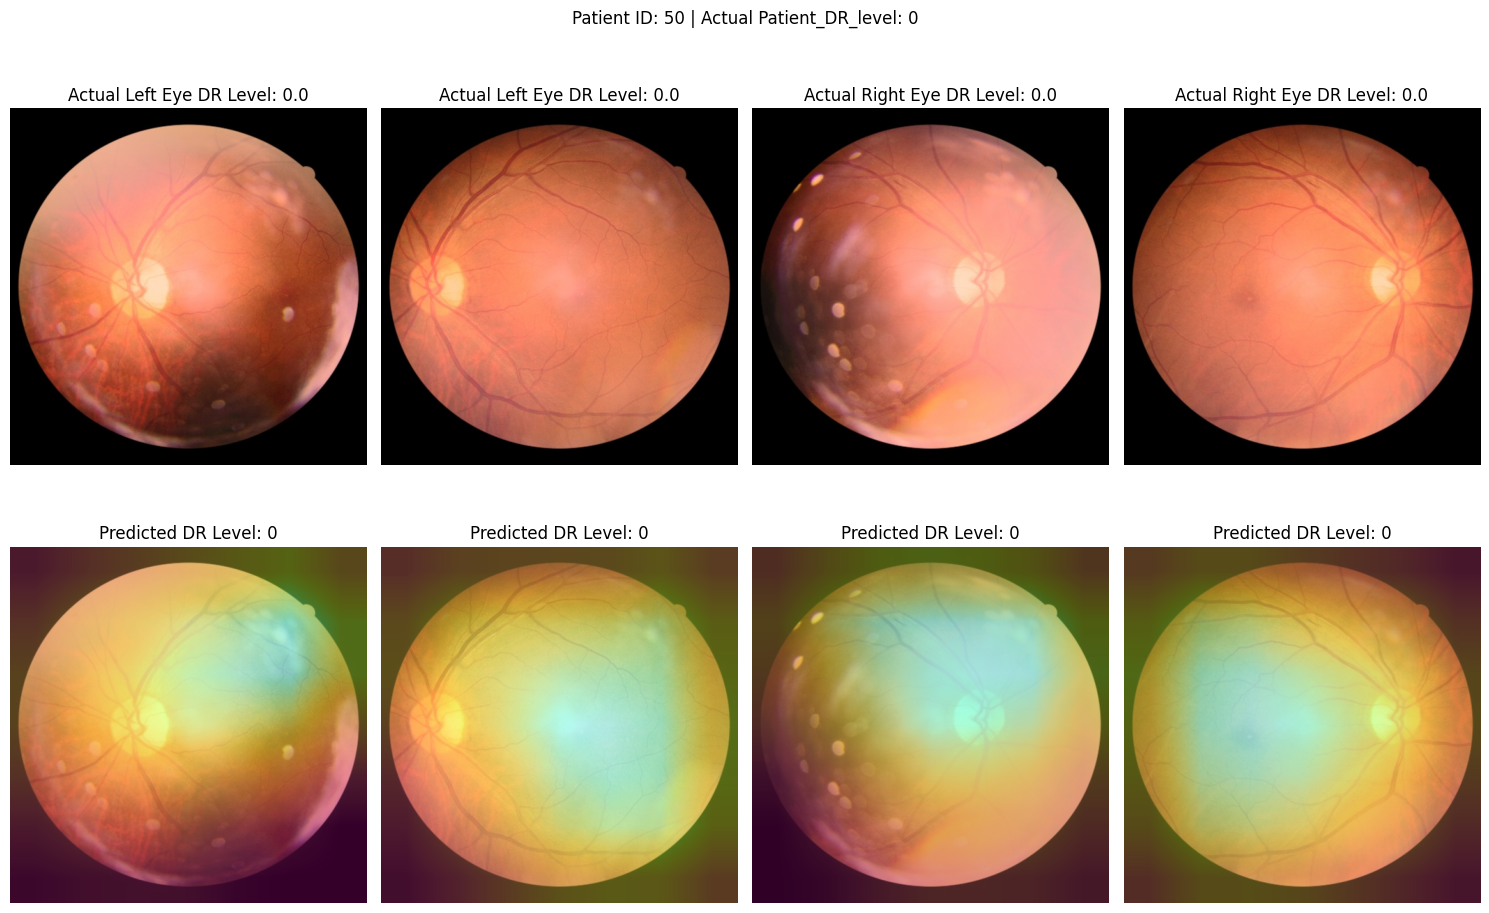

In [19]:
# d) Applying Different preprocessing techniques, like Ben Graham's, CLAHE, Sharpening, Circular Cropping,
# Gaussian Blur and training Resnet18 model from (a).

# Ben Graham's with Sharpening, GaussianBlur, and CircularCrop
from Augmentations import EnhancedBenGrahamTransform, CircleCropTransform

transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((210, 210)),
    SLORandomPad((224, 224)), 
    FundRandomRotate(prob=0.5, degree=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
    CutOut(mask_size=40, p=0.5),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# using 'single' mode.
mode = 'single'
train_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/train.csv', './DeepDRiD/train/', transform_train, mode)
val_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/val.csv', './DeepDRiD/val/', transform_test, mode)
test_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/test.csv', './DeepDRiD/test/', transform_test, mode, test=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualizing how the transformations look
train_df = pd.read_csv('./DeepDRiD/train.csv') 
images = './DeepDRiD/train/'
random_patient = random.choice(train_df['patient_id'].unique()) 

plotPatientEyeImgsWithLabels(train_df, random_patient, images, transform_train)

# Selecting resnet18 Model, with Single image option
model_name = 'resnet18'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}_with_ORDPreprocessing.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}_with_ORDPreprocessing.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

plotRandomPatientEyeImagesWithGRADCam(train_df, random_patient, images, transform_train, model)

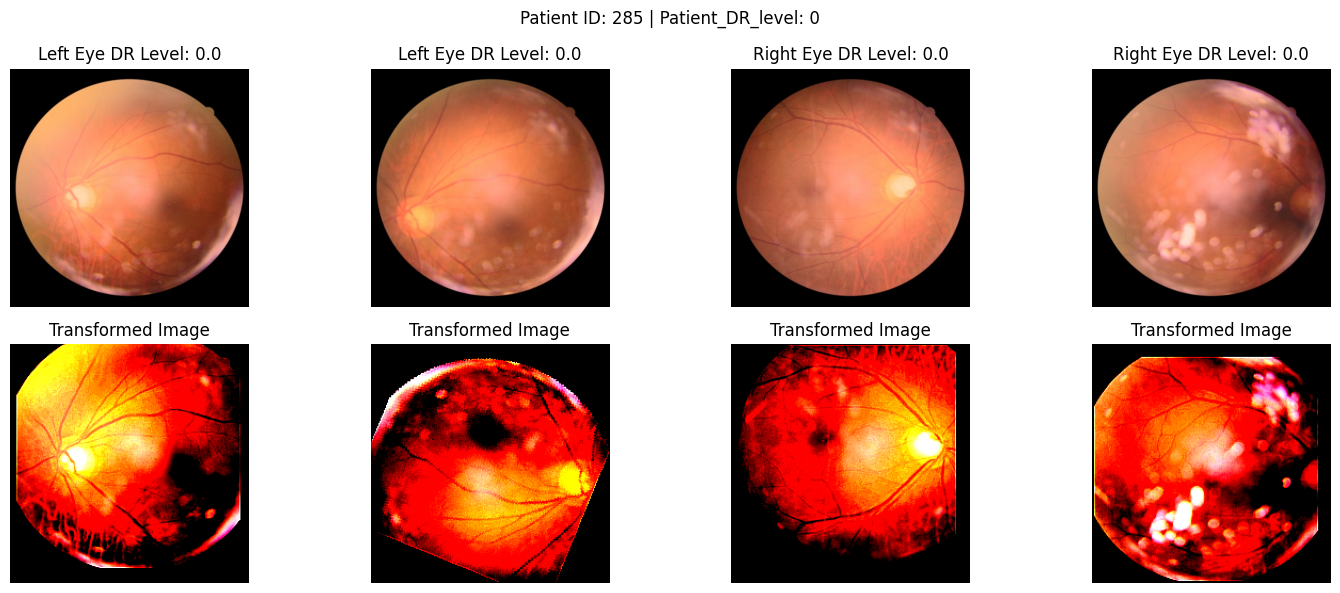

c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\usama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Device: cuda

Epoch 1/20
Training: 100%|██████████| 50/50 [00:11<00:00,  4.46 batch/s, lr=1.0e-04, Loss=1.1576]
[Train] Kappa: 0.4665 Accuracy: 0.4300 Precision: 0.3798 Recall: 0.4300 Loss: 1.3971
[Train] Class 0: Precision: 0.5304, Recall: 0.9194
[Train] Class 1: Precision: 0.3837, Recall: 0.1375
[Train] Class 2: Precision: 0.2843, Recall: 0.2417
[Train] Class 3: Precision: 0.3520, Recall: 0.3667
[Train] Class 4: Precision: 0.1667, Recall: 0.0500
Evaluating: 100%|██████████| 17/17 [00:02<00:00,  8.02 batch/s]
[Val] Kappa: 0.6201 Accuracy: 0.5250 Precision: 0.4991 Recall: 0.5250

Epoch 2/20
Training: 100%|██████████| 50/50 [00:10<00:00,  4.68 batch/s, lr=1.0e-04, Loss=0.9619]
[Train] Kappa: 0.7070 Accuracy: 0.5592 Precision: 0.5061 Recall: 0.5592 Loss: 1.1106
[Train] Class 0: Precision: 0.7843, Recall: 0.9694
[Train] Class 1: Precision: 0.4829, Recall: 0.4125
[Train] Class 2: Precision: 0.3195, Recall: 0.3208
[Train] Class 3: Precision: 0.4801, Recall: 0.6042
[Train] Class 4: Precision

<Figure size 600x500 with 0 Axes>

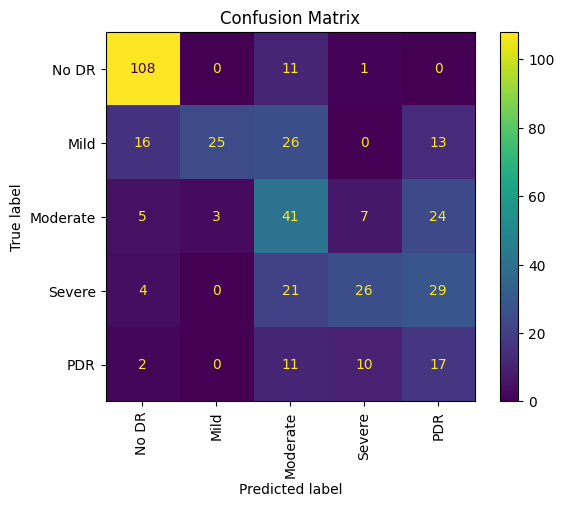

C:\Users\usama\AppData\Local\Temp\ipykernel_12104\320450110.py:64: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location='cpu')

Evaluating: 100%|██████████| 17/17 [00:02<00:00,  7.34 batch/s]
[Test] Save predictions to d:\Oulu MSc\Autumn 2024\Deep Learning\Deep Learning Final Project\project\test_predictions_DeepDRiD_resnet18_with_BGPreprocessing.csv


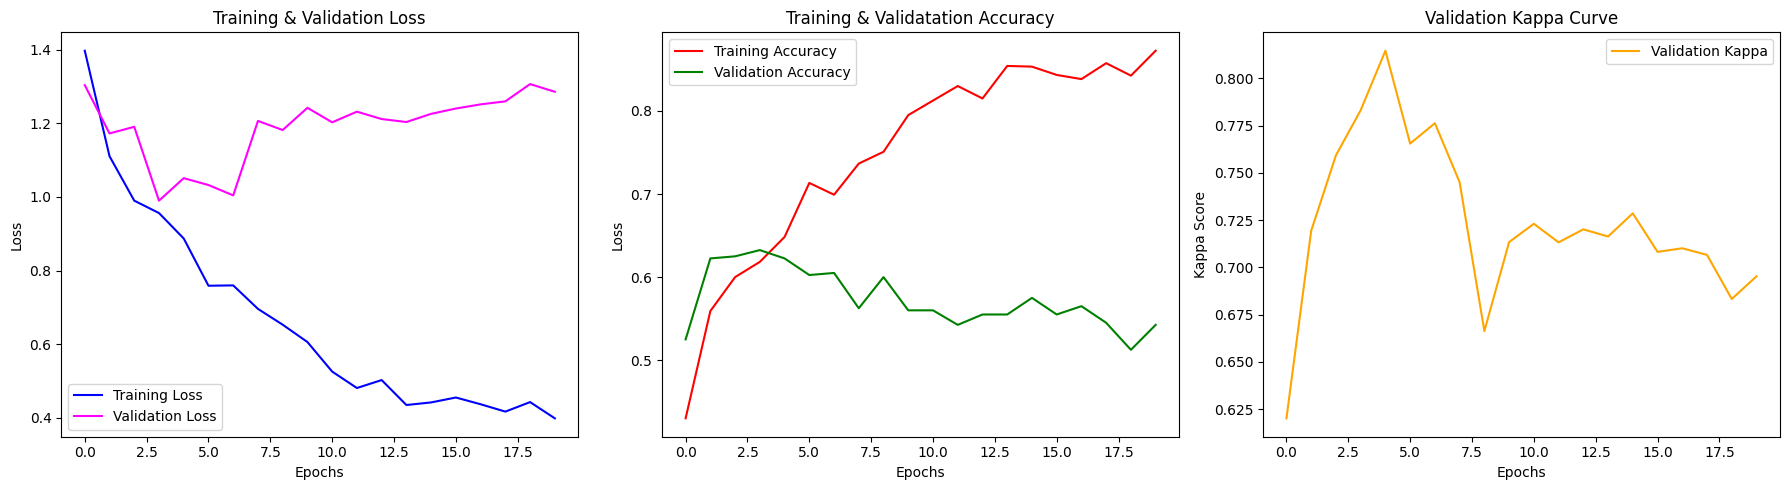

resnet18
Avg Kappa Score for 20 epochs:  0.7233993525039283
All Kappa Scores: 
 [0.6201052016364699, 0.7193490553027169, 0.7592982456140351, 0.7831584271083576, 0.814663951120163, 0.765522661776264, 0.7762936065361172, 0.7450738916256158, 0.6662903908564979, 0.713375796178344, 0.723069105691057, 0.7132506447255311, 0.7201191510487774, 0.7163345602233786, 0.7286038879070942, 0.708214595465246, 0.7101096224116931, 0.7066090179122915, 0.6832775505144415, 0.6952676864244742]


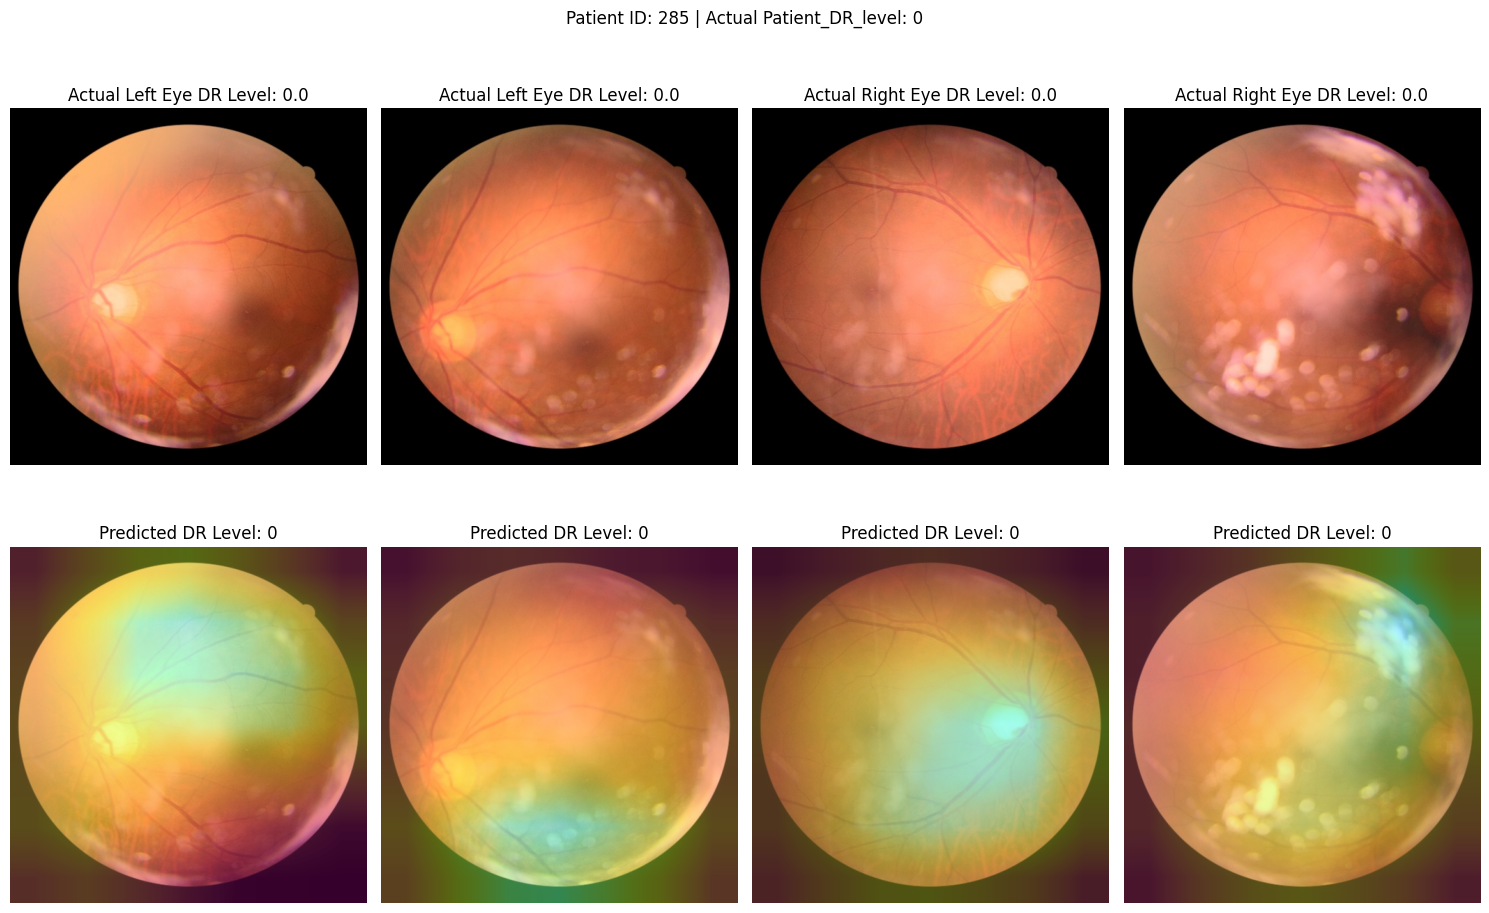

In [20]:
# d) Applying Different preprocessing techniques, like Ben Graham's, CLAHE, Sharpening, Circular Cropping,
# Gaussian Blur and training Resnet18 model from (a).

# Ben Graham's with Sharpening, GaussianBlur, and CircularCrop
from Augmentations import EnhancedBenGrahamTransform, CircleCropTransform

transform_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((210, 210)),
    SLORandomPad((224, 224)), 
    FundRandomRotate(prob=0.5, degree=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    EnhancedBenGrahamTransform(), 
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# using 'single' mode.
mode = 'single'
train_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/train.csv', './DeepDRiD/train/', transform_train, mode)
val_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/val.csv', './DeepDRiD/val/', transform_test, mode)
test_dataset = RetinopathyDataset_DeepDRiD('./DeepDRiD/test.csv', './DeepDRiD/test/', transform_test, mode, test=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Visualizing how the transformations look
train_df = pd.read_csv('./DeepDRiD/train.csv') 
images = './DeepDRiD/train/'
random_patient = random.choice(train_df['patient_id'].unique()) 

plotPatientEyeImgsWithLabels(train_df, random_patient, images, transform_train)

# Selecting resnet18 Model, with Single image option
model_name = 'resnet18'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

model = Resnet18_Single()
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

checkpoint_path = f'./DeepDRiD_{model_name}_with_BGPreprocessing.pth'
prediction_path = f'./test_predictions_DeepDRiD_{model_name}_with_BGPreprocessing.csv'

model, train_losses, val_kappas, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, device, criterion, optimizer,
    lr_scheduler=lr_scheduler, num_epochs=num_epochs,
    checkpoint_path=checkpoint_path
)

state_dict = torch.load(checkpoint_path, map_location='cpu')
model.load_state_dict(state_dict, strict=True)

evaluate_model(model, test_loader, device, test_only=True, 
                prediction_path=prediction_path)

plotTrainingValCurves(train_losses, val_kappas, val_losses, train_accuracies, val_accuracies)
print(f'{model_name}')
print(f'Avg Kappa Score for {num_epochs} epochs: ', np.mean(val_kappas))
print(f'All Kappa Scores: \n', val_kappas)

plotRandomPatientEyeImagesWithGRADCam(train_df, random_patient, images, transform_train, model)